# CV0003 Mini Project: Happines World Report
#### Which variable contributes the most to the Happiness Score across all countries?
#### What defines a happy country?

# Importing Basic Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Cleaning the Dataset

In [4]:
#Reading the excel file consisting the data
data = pd.read_excel('WHR2018Chapter2OnlineData.xls', header = None)
data.head()

0     1            2                   3               4   \
0      country  year  Life Ladder  Log GDP per capita  Social support   
1  Afghanistan  2008      3.72359             7.16869        0.450662   
2  Afghanistan  2009      4.40178             7.33379        0.552308   
3  Afghanistan  2010      4.75838             7.38663        0.539075   
4  Afghanistan  2011      3.83172             7.41502        0.521104   

                                 5                             6           7   \
0  Healthy life expectancy at birth  Freedom to make life choices  Generosity   
1                           49.2097                      0.718114    0.181819   
2                           49.6244                      0.678896    0.203614   
3                            50.009                      0.600127     0.13763   
4                           50.3673                      0.495901    0.175329   

                          8                9                10  \
0  Perceptions of corruption  Positive affect  Negative affect   
1                   0.881686         0.517637         0.258195   
2                   0.850035         0.583926         0.237092   
3                   0.706766         0.618265         0.275324   
4                   0.731109         0.611387         0.267175   

                                  11                  12                13  \
0  Confidence in national government  Democratic Quality  Delivery Quality   
1                           0.612072            -1.92969          -1.65508   
2                           0.611545            -2.04409          -1.63502   
3                           0.299357            -1.99181          -1.61718   
4                           0.307386            -1.91902          -1.61622   

                                             14  \
0  Standard deviation of ladder by country-year   
1                                       1.77466   
2                                       1.72269   
3                                       1.87862   
4                                       1.78536   

                                                  15  \
0  Standard deviation/Mean of ladder by country-year   
1                                             0.4766   
2                                           0.391362   
3                                           0.394803   
4                                           0.465942   

                                 16  \
0  GINI index (World Bank estimate)   
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   

                                                  17  \
0  GINI index (World Bank estimate), average 2000-15   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                                  18  
0  gini of household income reported in Gallup, b...  
1                                                NaN  
2                                           0.441906  
3                                           0.327318  
4                                           0.336764

In [5]:
#Drop the first row of numbers
data.columns = data.iloc[0]
data.drop(0)

0         country  year Life Ladder Log GDP per capita Social support  \
1     Afghanistan  2008     3.72359            7.16869       0.450662   
2     Afghanistan  2009     4.40178            7.33379       0.552308   
3     Afghanistan  2010     4.75838            7.38663       0.539075   
4     Afghanistan  2011     3.83172            7.41502       0.521104   
5     Afghanistan  2012     3.78294            7.51713       0.520637   
...           ...   ...         ...                ...            ...   
1558     Zimbabwe  2013     4.69019            7.56515       0.799274   
1559     Zimbabwe  2014     4.18445            7.56275       0.765839   
1560     Zimbabwe  2015     3.70319            7.55605         0.7358   
1561     Zimbabwe  2016      3.7354            7.53883       0.768425   
1562     Zimbabwe  2017      3.6383            7.53819       0.754147   

0    Healthy life expectancy at birth Freedom to make life choices Generosity  \
1                             49.2097                     0.718114   0.181819   
2                             49.6244                     0.678896   0.203614   
3                              50.009                     0.600127    0.13763   
4                             50.3673                     0.495901   0.175329   
5                             50.7093                     0.530935   0.247159   
...                               ...                          ...        ...   
1558                          48.9497                     0.575884 -0.0767157   
1559                          50.0512                     0.642034 -0.0458847   
1560                          50.9257                     0.667193 -0.0945846   
1561                          51.8001                     0.732971 -0.0652831   
1562                          52.6745                     0.752826 -0.0660047   

0    Perceptions of corruption Positive affect Negative affect  \
1                     0.881686        0.517637        0.258195   
2                     0.850035        0.583926        0.237092   
3                     0.706766        0.618265        0.275324   
4                     0.731109        0.611387        0.267175   
5                      0.77562        0.710385        0.267919   
...                        ...             ...             ...   
1558                  0.830937        0.711885        0.182288   
1559                  0.820217        0.725214        0.239111   
1560                  0.810457        0.715079        0.178861   
1561                  0.723612        0.737636        0.208555   
1562                  0.751208        0.806428        0.224051   

0    Confidence in national government Democratic Quality Delivery Quality  \
1                             0.612072           -1.92969         -1.65508   
2                             0.611545           -2.04409         -1.63502   
3                             0.299357           -1.99181         -1.61718   
4                             0.307386           -1.91902         -1.61622   
5                              0.43544             -1.843         -1.40408   
...                                ...                ...              ...   
1558                          0.527755           -1.02608         -1.52632   
1559                          0.566209          -0.985267         -1.48407   
1560                          0.590012          -0.893078         -1.35751   
1561                          0.699344          -0.863044         -1.37121   
1562                          0.682647                NaN              NaN   

0    Standard deviation of ladder by country-year  \
1                                         1.77466   
2                                         1.72269   
3                                         1.87862   
4                                         1.78536   
5                                         1.79828   
...                                           ...   
1558                                       1.9648

In [6]:
#Check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 19 columns):
country                                                     1563 non-null object
year                                                        1563 non-null object
Life Ladder                                                 1563 non-null object
Log GDP per capita                                          1536 non-null object
Social support                                              1550 non-null object
Healthy life expectancy at birth                            1554 non-null object
Freedom to make life choices                                1534 non-null object
Generosity                                                  1483 non-null object
Perceptions of corruption                                   1473 non-null object
Positive affect                                             1545 non-null object
Negative affect                                             1551 non-null object
Co

In [7]:
data.describe()

0       country  year  Life Ladder  Log GDP per capita  Social support  \
count      1563  1563  1563.000000         1536.000000     1550.000000   
unique      165    14  1563.000000         1536.000000     1550.000000   
top     Uruguay  2011     4.162165           10.068411        0.754147   
freq         12   146     1.000000            1.000000        1.000000   

0       Healthy life expectancy at birth  Freedom to make life choices  \
count                         1554.00000                   1534.000000   
unique                        1501.00000                   1533.000000   
top                             69.77092                      0.683558   
freq                             6.00000                      2.000000   

0        Generosity  Perceptions of corruption  Positive affect  \
count   1483.000000                1473.000000      1545.000000   
unique  1483.000000                1473.000000      1545.000000   
top       -0.066005                   0.751208         0.806428   
freq       1.000000                   1.000000         1.000000   

0       Negative affect  Confidence in national government  \
count       1551.000000                               1402   
unique      1551.000000                               1402   
top            0.224051  Confidence in national government   
freq           1.000000                                  1   

0       Democratic Quality  Delivery Quality  \
count          1392.000000       1392.000000   
unique         1392.000000       1392.000000   
top              -1.842996         -1.616221   
freq              1.000000          1.000000   

0       Standard deviation of ladder by country-year  \
count                                    1563.000000   
unique                                   1563.000000   
top                                         1.598173   
freq                                        1.000000   

0       Standard deviation/Mean of ladder by country-year  \
count                                         1563.000000   
unique                                        1562.000000   
top                                              0.365372   
freq                                             2.000000   

0       GINI index (World Bank estimate)  \
count                            584.000   
unique                           267.000   
top                                0.315   
freq                               8.000   

0       GINI index (World Bank estimate), average 2000-15  \
count                                            1387.000   
unique                                            136.000   
top                                                 0.425   
freq                                               24.000   

0      gini of household income reported in Gallup, by wp5-year  
count                                                1206        
unique                                               1206        
top     gini of household income reported in Gallup, b...        
freq                                                    1

In [8]:
#Making a copy of the original dataset
copy = data.copy()
copy = copy.drop(0)
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1562 entries, 1 to 1562
Data columns (total 19 columns):
country                                                     1562 non-null object
year                                                        1562 non-null object
Life Ladder                                                 1562 non-null object
Log GDP per capita                                          1535 non-null object
Social support                                              1549 non-null object
Healthy life expectancy at birth                            1553 non-null object
Freedom to make life choices                                1533 non-null object
Generosity                                                  1482 non-null object
Perceptions of corruption                                   1472 non-null object
Positive affect                                             1544 non-null object
Negative affect                                             1550 non-null object
Co

In [9]:
#Changing the data types to floats, since they are recognised as objects
copy['Life Ladder'] = copy['Life Ladder'].astype('float64')
copy['Log GDP per capita'] = copy['Log GDP per capita'].astype('float64')
copy['country'] = copy['country'].astype('category')
copy['Social support'] = copy['Social support'].astype('float64')
copy['Healthy life expectancy at birth'] = copy['Healthy life expectancy at birth'].astype('float64')
copy['Freedom to make life choices'] = copy['Freedom to make life choices'].astype('float64')
copy['Generosity'] = copy['Generosity'].astype('float64')
copy['Perceptions of corruption'] = copy['Perceptions of corruption'].astype('float64')
copy['Positive affect'] = copy['Positive affect'].astype('float64')
copy['Negative affect'] = copy['Negative affect'].astype('float64')
copy['Confidence in national government'] = copy['Confidence in national government'].astype('float64')
copy['Democratic Quality'] = copy['Democratic Quality'].astype('float64')
copy['Delivery Quality'] = copy['Delivery Quality'].astype('float64')
copy['Standard deviation of ladder by country-year'] = copy['Standard deviation of ladder by country-year'].astype('float64')
copy['Standard deviation/Mean of ladder by country-year'] = copy['Standard deviation/Mean of ladder by country-year'].astype('float64')
copy['GINI index (World Bank estimate)'] = copy['GINI index (World Bank estimate)'].astype('float64')
copy['GINI index (World Bank estimate), average 2000-15'] = copy['GINI index (World Bank estimate), average 2000-15'].astype('float64')
copy['gini of household income reported in Gallup, by wp5-year'] = copy['gini of household income reported in Gallup, by wp5-year'].astype('float64')

In [10]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1562 entries, 1 to 1562
Data columns (total 19 columns):
country                                                     1562 non-null category
year                                                        1562 non-null object
Life Ladder                                                 1562 non-null float64
Log GDP per capita                                          1535 non-null float64
Social support                                              1549 non-null float64
Healthy life expectancy at birth                            1553 non-null float64
Freedom to make life choices                                1533 non-null float64
Generosity                                                  1482 non-null float64
Perceptions of corruption                                   1472 non-null float64
Positive affect                                             1544 non-null float64
Negative affect                                             1550 non-null

In [11]:
copy.head()

0      country  year  Life Ladder  Log GDP per capita  Social support  \
1  Afghanistan  2008     3.723590            7.168690        0.450662   
2  Afghanistan  2009     4.401778            7.333790        0.552308   
3  Afghanistan  2010     4.758381            7.386629        0.539075   
4  Afghanistan  2011     3.831719            7.415019        0.521104   
5  Afghanistan  2012     3.782938            7.517126        0.520637   

0  Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
1                         49.209663                      0.718114    0.181819   
2                         49.624432                      0.678896    0.203614   
3                         50.008961                      0.600127    0.137630   
4                         50.367298                      0.495901    0.175329   
5                         50.709263                      0.530935    0.247159   

0  Perceptions of corruption  Positive affect  Negative affect  \
1                   0.881686         0.517637         0.258195   
2                   0.850035         0.583926         0.237092   
3                   0.706766         0.618265         0.275324   
4                   0.731109         0.611387         0.267175   
5                   0.775620         0.710385         0.267919   

0  Confidence in national government  Democratic Quality  Delivery Quality  \
1                           0.612072           -1.929690         -1.655084   
2                           0.611545           -2.044093         -1.635025   
3                           0.299357           -1.991810         -1.617176   
4                           0.307386           -1.919018         -1.616221   
5                           0.435440           -1.842996         -1.404078   

0  Standard deviation of ladder by country-year  \
1                                      1.774662   
2                                      1.722688   
3                                      1.878622   
4                                      1.785360   
5                                      1.798283   

0  Standard deviation/Mean of ladder by country-year  \
1                                           0.476600   
2                                           0.391362   
3                                           0.394803   
4                                           0.465942   
5                                           0.475367   

0  GINI index (World Bank estimate)  \
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   
5                               NaN   

0  GINI index (World Bank estimate), average 2000-15  \
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   

0  gini of household income reported in Gallup, by wp5-year  
1                                                NaN         
2                                           0.441906         
3                                           0.327318         
4                                           0.336764         
5                                           0.344540

## Presense of null values
#### In order to clean our data, our group decided to replace all the null values with mean values of that variable.

In [12]:
#Finding the mean values of all the variables with respect to countries
mean_copy = copy.groupby('country').mean().reset_index()

#Replace the first column with Country
mean_copy.set_index('country', inplace = True)

In [13]:
mean_copy

0            Life Ladder  Log GDP per capita  Social support  \
country                                                        
Afghanistan     3.806614            7.419697        0.517146   
Albania         4.988791            9.247059        0.723204   
Algeria         5.555004            9.501728        0.804633   
Angola          4.420299            8.713935        0.737973   
Argentina       6.406131            9.826051        0.906080   
...                  ...                 ...             ...   
Venezuela       6.414997            9.706075        0.925062   
Vietnam         5.293268            8.477400        0.827200   
Yemen           3.969106            8.191046        0.721817   
Zambia          4.685380            8.095450        0.745987   
Zimbabwe        4.064211            7.415946        0.811693   

0            Healthy life expectancy at birth  Freedom to make life choices  \
country                                                                       
Afghanistan                         50.838271                      0.544895   
Albania                             68.027213                      0.626155   
Algeria                             64.984461                      0.536398   
Angola                              51.729801                      0.455957   
Argentina                           66.764205                      0.753122   
...                                       ...                           ...   
Venezuela                           64.120754                      0.682923   
Vietnam                             65.357492                      0.871811   
Yemen                               54.056593                      0.626482   
Zambia                              49.643073                      0.749263   
Zimbabwe                            46.415665                      0.564987   

0            Generosity  Perceptions of corruption  Positive affect  \
country                                                               
Afghanistan    0.118428                   0.826794         0.580873   
Albania       -0.105019                   0.859691         0.642628   
Algeria       -0.208236                   0.661478         0.616524   
Angola        -0.077940                   0.867018         0.613339   
Argentina     -0.154544                   0.844038         0.840998   
...                 ...                        ...              ...   
Venezuela     -0.192087                   0.782355         0.823428   
Vietnam        0.019168                   0.781401         0.631631   
Yemen         -0.132600                   0.833238         0.536306   
Zambia        -0.008872                   0.831900         0.722792   
Zimbabwe      -0.064208                   0.849916         0.719749   

0            Negative affect  Confidence in national government  \
country                                                           
Afghanistan         0.301283                           0.400442   
Albania             0.303256                           0.409726   
Algeria             0.265460                                NaN   
Angola              0.351173                           0.397389   
Argentina           0.273187                           0.400587   
...                      ...                                ...   
Venezuela           0.219652                           0.432210   
Vietnam             0.209818                           0.848363   
Yemen               0.299466                           0.403448   
Zambia              0.275567                           0.554312   
Zimbabwe            0.214457                           0.448324   

0            Democratic Quality  Delivery Quality  \
country                                             
Afghanistan           -1.904737         -1.485251   
Albania                0.071527         -0.260937   
Algeria               -1.089971         -0.777121   
Angola                -0.743011         -1.180481   
Argentina              0.

#### We decided to collect data from 4 recent years to fill up null values since they will be a good estimate.

In [14]:
#Obtaining data from these years to estimate a value for the missing values
data_2014 = data[data['year']==2014]
data_2015 = data[data['year']==2015]
data_2016 = data[data['year']==2016]
data_2017 = data[data['year']==2017]

In [15]:
#Combining the data together
combineddata = pd.concat([data_2014,data_2015,data_2016,data_2017])
combineddata

0         country  year Life Ladder Log GDP per capita Social support  \
7     Afghanistan  2014      3.1309            7.48458       0.525568   
17        Albania  2014     4.81376             9.2781       0.625587   
24        Algeria  2014      6.3549            9.50921       0.818189   
30         Angola  2014     3.79484            8.74196       0.754615   
39      Argentina  2014     6.67111            9.84148        0.91787   
...           ...   ...         ...                ...            ...   
1506   Uzbekistan  2017     6.42145            8.76278       0.942131   
1529      Vietnam  2017     5.17528            8.74265            NaN   
1539        Yemen  2017     3.25356                NaN       0.789555   
1550       Zambia  2017     3.93278            8.21167       0.743754   
1562     Zimbabwe  2017      3.6383            7.53819       0.754147   

0    Healthy life expectancy at birth Freedom to make life choices Generosity  \
7                             51.3705                     0.508514   0.118579   
17                            68.5121                     0.734648 -0.0305527   
24                            65.1302                          NaN        NaN   
30                            52.4607                     0.374542  -0.157882   
39                            67.1181                     0.745058  -0.164529   
...                               ...                          ...        ...   
1506                          63.1662                     0.985178   0.114029   
1529                          66.2458                          NaN        NaN   
1539                           54.981                     0.595191        NaN   
1550                          53.8038                     0.823169   0.129822   
1562                          52.6745                     0.752826 -0.0660047   

0    Perceptions of corruption Positive affect Negative affect  \
7                     0.871242        0.531691        0.374861   
17                    0.882704        0.684911        0.334543   
24                         NaN        0.625905        0.176866   
30                    0.834076        0.578517        0.367864   
39                    0.854192        0.857124        0.237913   
...                        ...             ...             ...   
1506                  0.464642        0.838989        0.202737   
1529                       NaN             NaN             NaN   
1539                       NaN        0.455182        0.295064   
1550                  0.739541        0.684623        0.387189   
1562                  0.751208        0.806428        0.224051   

0    Confidence in national government Democratic Quality Delivery Quality  \
7                             0.409048           -1.77326          -1.3125   
17                            0.498786           0.314873        -0.187407   
24                                 NaN           -1.00287        -0.783428   
30                            0.572346          -0.739363         -1.16854   
39                            0.408961           0.170099        -0.665262   
...                                ...                ...              ...   
1506                           0.96469                NaN              NaN   
1529                               NaN                NaN              NaN   
1539                          0.247787                NaN              NaN   
1550                          0.717004                NaN              NaN   
1562                          0.682647                NaN              NaN   

0    Standard deviation of ladder by country-year  \
7                                          1.3954   
17                                        2.66007   
24                                        1.63246   
30                                        2.19671   
39                                        2.12926   
...                                           ...   
1506                                      2.36769

In [16]:
#Organise by countries, not by year
sorted_combineddata= combineddata.sort_values(by=['country'])
sorted_combineddata.head()

0       country  year Life Ladder Log GDP per capita Social support  \
7   Afghanistan  2014      3.1309            7.48458       0.525568   
10  Afghanistan  2017     2.66172            7.46014        0.49088   
9   Afghanistan  2016     4.22017             7.4614       0.559072   
8   Afghanistan  2015     3.98285            7.46622       0.528597   
20      Albania  2017     4.63955            9.37372       0.637698   

0  Healthy life expectancy at birth Freedom to make life choices Generosity  \
7                           51.3705                     0.508514   0.118579   
10                          52.3395                     0.427011   -0.10634   
9                           52.0165                     0.522566  0.0570721   
8                           51.6935                     0.388928  0.0946856   
20                          69.0517                     0.749611 -0.0351404   

0  Perceptions of corruption Positive affect Negative affect  \
7                   0.871242        0.531691        0.374861   
10                  0.954393        0.496349        0.371326   
9                   0.793246        0.564953        0.348332   
8                   0.880638        0.553553        0.339276   
20                  0.876135        0.669241        0.333884   

0  Confidence in national government Democratic Quality Delivery Quality  \
7                           0.409048           -1.77326          -1.3125   
10                          0.261179                NaN              NaN   
9                            0.32499           -1.91769         -1.43255   
8                           0.260557           -1.84436         -1.29159   
20                          0.457738                NaN              NaN   

0  Standard deviation of ladder by country-year  \
7                                        1.3954   
10                                      1.45405   
9                                       1.79622   
8                                       2.16062   
20                                       2.6821   

0  Standard deviation/Mean of ladder by country-year  \
7                                           0.445686   
10                                          0.546283   
9                                           0.425627   
8                                            0.54248   
20                                          0.578096   

0  GINI index (World Bank estimate)  \
7                               NaN   
10                              NaN   
9                               NaN   
8                               NaN   
20                              NaN   

0  GINI index (World Bank estimate), average 2000-15  \
7                                                NaN   
10                                               NaN   
9                                                NaN   
8                                                NaN   
20                                           0.30325   

0  gini of household income reported in Gallup, by wp5-year  
7                                            0.413974        
10                                           0.286599        
9                                            0.418629        
8                                            0.596918        
20                                           0.410488

In [17]:
#Resetting the Index
sorted_combineddata = sorted_combineddata.reset_index().drop('index', axis = 1)
sorted_combineddata.head()

0      country  year Life Ladder Log GDP per capita Social support  \
0  Afghanistan  2014      3.1309            7.48458       0.525568   
1  Afghanistan  2017     2.66172            7.46014        0.49088   
2  Afghanistan  2016     4.22017             7.4614       0.559072   
3  Afghanistan  2015     3.98285            7.46622       0.528597   
4      Albania  2017     4.63955            9.37372       0.637698   

0 Healthy life expectancy at birth Freedom to make life choices Generosity  \
0                          51.3705                     0.508514   0.118579   
1                          52.3395                     0.427011   -0.10634   
2                          52.0165                     0.522566  0.0570721   
3                          51.6935                     0.388928  0.0946856   
4                          69.0517                     0.749611 -0.0351404   

0 Perceptions of corruption Positive affect Negative affect  \
0                  0.871242        0.531691        0.374861   
1                  0.954393        0.496349        0.371326   
2                  0.793246        0.564953        0.348332   
3                  0.880638        0.553553        0.339276   
4                  0.876135        0.669241        0.333884   

0 Confidence in national government Democratic Quality Delivery Quality  \
0                          0.409048           -1.77326          -1.3125   
1                          0.261179                NaN              NaN   
2                           0.32499           -1.91769         -1.43255   
3                          0.260557           -1.84436         -1.29159   
4                          0.457738                NaN              NaN   

0 Standard deviation of ladder by country-year  \
0                                       1.3954   
1                                      1.45405   
2                                      1.79622   
3                                      2.16062   
4                                       2.6821   

0 Standard deviation/Mean of ladder by country-year  \
0                                          0.445686   
1                                          0.546283   
2                                          0.425627   
3                                           0.54248   
4                                          0.578096   

0 GINI index (World Bank estimate)  \
0                              NaN   
1                              NaN   
2                              NaN   
3                              NaN   
4                              NaN   

0 GINI index (World Bank estimate), average 2000-15  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                           0.30325   

0 gini of household income reported in Gallup, by wp5-year  
0                                           0.413974        
1                                           0.286599        
2                                           0.418629        
3                                           0.596918        
4                                           0.410488

In [18]:
#Changing the data types to floats, except year
sorted_combineddata['year'] = sorted_combineddata['year'].astype('int64')
sorted_combineddata['Life Ladder'] = sorted_combineddata['Life Ladder'].astype('float64')
sorted_combineddata['Log GDP per capita'] = sorted_combineddata['Log GDP per capita'].astype('float64')
sorted_combineddata['country'] = sorted_combineddata['country'].astype('category')
sorted_combineddata['Social support'] = sorted_combineddata['Social support'].astype('float64')
sorted_combineddata['Healthy life expectancy at birth'] = sorted_combineddata['Healthy life expectancy at birth'].astype('float64')
sorted_combineddata['Freedom to make life choices'] = sorted_combineddata['Freedom to make life choices'].astype('float64')
sorted_combineddata['Generosity'] = sorted_combineddata['Generosity'].astype('float64')
sorted_combineddata['Perceptions of corruption'] = sorted_combineddata['Perceptions of corruption'].astype('float64')
sorted_combineddata['Positive affect'] = sorted_combineddata['Positive affect'].astype('float64')
sorted_combineddata['Negative affect'] = sorted_combineddata['Negative affect'].astype('float64')
sorted_combineddata['Confidence in national government'] = sorted_combineddata['Confidence in national government'].astype('float64')
sorted_combineddata['Democratic Quality'] = sorted_combineddata['Democratic Quality'].astype('float64')
sorted_combineddata['Delivery Quality'] = sorted_combineddata['Delivery Quality'].astype('float64')
sorted_combineddata['Standard deviation of ladder by country-year'] = sorted_combineddata['Standard deviation of ladder by country-year'].astype('float64')
sorted_combineddata['Standard deviation/Mean of ladder by country-year'] = sorted_combineddata['Standard deviation/Mean of ladder by country-year'].astype('float64')
sorted_combineddata['GINI index (World Bank estimate)'] = sorted_combineddata['GINI index (World Bank estimate)'].astype('float64')
sorted_combineddata['GINI index (World Bank estimate), average 2000-15'] = sorted_combineddata['GINI index (World Bank estimate), average 2000-15'].astype('float64')
sorted_combineddata['gini of household income reported in Gallup, by wp5-year'] = sorted_combineddata['gini of household income reported in Gallup, by wp5-year'].astype('float64')

In [108]:
#Combining mean_copy and sorted_combineddata
finaldata = sorted_combineddata.merge(mean_copy, on='country')
finaldata

0        country  year  Life Ladder_x  Log GDP per capita_x  Social support_x  \
0    Afghanistan  2014       3.130896              7.484583          0.525568   
1    Afghanistan  2017       2.661718              7.460144          0.490880   
2    Afghanistan  2016       4.220169              7.461401          0.559072   
3    Afghanistan  2015       3.982855              7.466215          0.528597   
4        Albania  2017       4.639548              9.373718          0.637698   
..           ...   ...            ...                   ...               ...   
566       Zambia  2014       4.345837              8.197678          0.706223   
567     Zimbabwe  2015       3.703191              7.556052          0.735800   
568     Zimbabwe  2014       4.184451              7.562753          0.765839   
569     Zimbabwe  2016       3.735400              7.538829          0.768425   
570     Zimbabwe  2017       3.638300              7.538187          0.754147   

0    Healthy life expectancy at birth_x  Freedom to make life choices_x  \
0                             51.370525                        0.508514   
1                             52.339527                        0.427011   
2                             52.016529                        0.522566   
3                             51.693527                        0.388928   
4                             69.051659                        0.749611   
..                                  ...                             ...   
566                           52.193890                        0.811825   
567                           50.925652                        0.667193   
568                           50.051235                        0.642034   
569                           51.800068                        0.732971   
570                           52.674484                        0.752826   

0    Generosity_x  Perceptions of corruption_x  Positive affect_x  ...  \
0        0.118579                     0.871242           0.531691  ...   
1       -0.106340                     0.954393           0.496349  ...   
2        0.057072                     0.793246           0.564953  ...   
3        0.094686                     0.880638           0.553553  ...   
4       -0.035140                     0.876135           0.669241  ...   
..            ...                          ...                ...  ...   
566     -0.020871                     0.808841           0.692035  ...   
567     -0.094585                     0.810457           0.715079  ...   
568     -0.045885                     0.820217           0.725214  ...   
569     -0.065283                     0.723612           0.737636  ...   
570     -0.066005                     0.751208           0.806428  ...   

0    Positive affect_y  Negative affect_y  \
0             0.580873           0.301283   
1             0.580873           0.301283   
2             0.580873           0.301283   
3             0.580873           0.301283   
4             0.642628           0.303256   
..                 ...                ...   
566           0.722792           0.275567   
567           0.719749           0.214457   
568           0.719749           0.214457   
569           0.719749           0.214457   
570           0.719749           0.214457   

0    Confidence in national government_y  Democratic Quality_y  \
0                               0.400442             -1.904737   
1                               0.400442             -1.904737   
2                               0.400442             -1.904737   
3                               0.400442             -1.904737   
4                               0.409726              0.071527   
..                                   ...                   ...   
566                             0.554312              0.104841   
567                             0.448324             -1.154359   
568                             0.448324             -1.154359   
569                             0.44

In [109]:
finaldata.shape

(571, 36)

In [110]:
#Replacing the NaN values with the mean values
for i in range(571):
    for j in range(2,19):
         if np.isnan(finaldata.iloc[i,j]):
            finaldata.iloc[i,j]=(finaldata.iloc[i,j+17])

In [111]:
#Finding the mean values for a better estimate
finaldata = finaldata.groupby('country').mean().reset_index()
finaldata

0        country         year  Life Ladder_x  Log GDP per capita_x  \
0    Afghanistan  2015.500000       3.498909              7.468086   
1        Albania  2015.500000       4.642766              9.323155   
2        Algeria  2015.666667       5.648221              9.530207   
3         Angola  2014.000000       3.794838              8.741957   
4      Argentina  2015.500000       6.458699              9.841867   
..           ...          ...            ...                   ...   
151    Venezuela  2015.000000       5.248671              9.638375   
152      Vietnam  2015.500000       5.099696              8.666449   
153        Yemen  2015.500000       3.507456              8.013866   
154       Zambia  2015.500000       4.367331              8.201803   
155     Zimbabwe  2015.500000       3.815336              7.548955   

0    Social support_x  Healthy life expectancy at birth_x  \
0            0.526029                           51.855027   
1            0.635263                           68.781881   
2            0.791177                           65.446287   
3            0.754615                           52.460709   
4            0.908470                           67.328417   
..                ...                                 ...   
151          0.905664                           64.603157   
152          0.836092                           65.990576   
153          0.717974                           54.704479   
154          0.727127                           52.998837   
155          0.756053                           51.362860   

0    Freedom to make life choices_x  Generosity_x  \
0                          0.461755      0.040999   
1                          0.729482     -0.043963   
2                          0.503155     -0.203714   
3                          0.374542     -0.157882   
4                          0.826487     -0.179273   
..                              ...           ...   
151                        0.513241     -0.204171   
152                        0.877446      0.003684   
153                        0.600511     -0.151890   
154                        0.801305      0.043062   
155                        0.698756     -0.067939   

0    Perceptions of corruption_x  Positive affect_x  ...  Positive affect_y  \
0                       0.874880           0.536636  ...           0.580873   
1                       0.886176           0.679441  ...           0.642628   
2                       0.674243           0.642798  ...           0.616524   
3                       0.834076           0.578517  ...           0.613339   
4                       0.849269           0.841749  ...           0.840998   
..                           ...                ...  ...                ...   
151                     0.843252           0.788729  ...           0.823428   
152                     0.785861           0.627870  ...           0.631631   
153                     0.845251           0.510637  ...           0.536306   
154                     0.797511           0.699343  ...           0.722792   
155                     0.776374           0.746089  ...           0.719749   

0    Negative affect_y  Confidence in national government_y  \
0             0.301283                             0.400442   
1             0.303256                             0.409726   
2             0.265460                                  NaN   
3             0.351173                             0.397389   
4             0.273187                             0.400587   
..                 ...                                  ...   
151           0.219652                             0.432210   
152           0.209818                             0.848363   
153           0.299466                             0.403448   
154           0.275567                             0.554312   
155           0.214457                             0.448324   

0    Democratic Quality_y  Delivery Quality_y  \
0               -1.904737         

In [112]:
#Filling the NaN values with the mean value of all the data
finaldata1 = finaldata.fillna(finaldata.mean())

#Dropping the year as it is not needed and don't make sense anyway
finaldata = finaldata1.drop('year', axis = 1)

## Merging the data
#### Since we will be analysing the Happiness Score with respect to the variables, we will have to merge the data from sheet 2

In [24]:
#Reading the Figure 2.2 data
score = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name = 'Figure2.2', header= None)
score.columns = score.iloc[0]
score

0                     Country  Happiness score  Whisker-high  Whisker-low  \
0                     Country  Happiness score  Whisker-high  Whisker-low   
1                     Finland           7.6321       7.69491      7.56929   
2                      Norway           7.5937       7.65708      7.53032   
3                     Denmark           7.5553       7.62329      7.48731   
4                     Iceland           7.4952       7.59253      7.39787   
..                        ...              ...           ...          ...   
153                  Tanzania           3.3035        3.4139       3.1931   
154               South Sudan           3.2542        3.3851       3.1233   
155  Central African Republic            3.083       3.22658      2.93942   
156                   Burundi           2.9045       3.07419      2.73481   
157                       NaN              NaN           NaN          NaN   

0    Dystopia (1.92) + residual  Explained by: GDP per capita  \
0    Dystopia (1.92) + residual  Explained by: GDP per capita   
1                       2.59519                        1.3051   
2                       2.38324                       1.45563   
3                       2.37018                       1.35115   
4                       2.42599                        1.3433   
..                          ...                           ...   
153                    0.628085                      0.454864   
154                     1.69063                       0.33737   
155                     2.48701                     0.0239054   
156                     1.75179                     0.0908062   
157                         NaN                           NaN   

0    Explained by: Social support  Explained by: Healthy life expectancy  \
0    Explained by: Social support  Explained by: Healthy life expectancy   
1                         1.59213                               0.874454   
2                         1.58234                               0.860763   
3                         1.59045                               0.867933   
4                         1.64438                               0.913802   
..                            ...                                    ...   
153                      0.991134                               0.381297   
154                      0.607502                                0.17746   
155                             0                              0.0101001   
156                      0.626902                               0.145325   
157                           NaN                                    NaN   

0    Explained by: Freedom to make life choices  Explained by: Generosity  \
0    Explained by: Freedom to make life choices  Explained by: Generosity   
1                                      0.680633                  0.191638   
2                                       0.68642                  0.285636   
3                                      0.683251                  0.284392   
4                                      0.676502                  0.353233   
..                                          ...                       ...   
153                                    0.480925                  0.270037   
154                                    0.111604                  0.223926   
155                                     0.30528                  0.218356   
156                                   0.0648504                  0.148904   
157                                         NaN                       NaN   

0    ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  \
0    ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1    ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2    ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3    ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4    ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
153  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   


In [25]:
#Extracting just the happiness score and dropping the first row as well
score1 = score[['Country','Happiness score']]
score1.drop(0)

0                     Country Happiness score
1                     Finland          7.6321
2                      Norway          7.5937
3                     Denmark          7.5553
4                     Iceland          7.4952
5                 Switzerland          7.4873
..                        ...             ...
153                  Tanzania          3.3035
154               South Sudan          3.2542
155  Central African Republic           3.083
156                   Burundi          2.9045
157                       NaN             NaN

[157 rows x 2 columns]

In [26]:
#Combining the dataset together but first converting the 'Country' to 'country' for consistency
score1 = score1.rename(columns = {'Country':'country'})
cleandata = finaldata.merge(score1, on = 'country')
cleandata

0        country  Life Ladder_x  Log GDP per capita_x  Social support_x  \
0    Afghanistan       3.498909              7.468086          0.526029   
1        Albania       4.642766              9.323155          0.635263   
2        Algeria       5.648221              9.530207          0.791177   
3         Angola       3.794838              8.741957          0.754615   
4      Argentina       6.458699              9.841867          0.908470   
..           ...            ...                   ...               ...   
148    Venezuela       5.248671              9.638375          0.905664   
149      Vietnam       5.099696              8.666449          0.836092   
150        Yemen       3.507456              8.013866          0.717974   
151       Zambia       4.367331              8.201803          0.727127   
152     Zimbabwe       3.815336              7.548955          0.756053   

0    Healthy life expectancy at birth_x  Freedom to make life choices_x  \
0                             51.855027                        0.461755   
1                             68.781881                        0.729482   
2                             65.446287                        0.503155   
3                             52.460709                        0.374542   
4                             67.328417                        0.826487   
..                                  ...                             ...   
148                           64.603157                        0.513241   
149                           65.990576                        0.877446   
150                           54.704479                        0.600511   
151                           52.998837                        0.801305   
152                           51.362860                        0.698756   

0    Generosity_x  Perceptions of corruption_x  Positive affect_x  \
0        0.040999                     0.874880           0.536636   
1       -0.043963                     0.886176           0.679441   
2       -0.203714                     0.674243           0.642798   
3       -0.157882                     0.834076           0.578517   
4       -0.179273                     0.849269           0.841749   
..            ...                          ...                ...   
148     -0.204171                     0.843252           0.788729   
149      0.003684                     0.785861           0.627870   
150     -0.151890                     0.845251           0.510637   
151      0.043062                     0.797511           0.699343   
152     -0.067939                     0.776374           0.746089   

0    Negative affect_x  ...  Negative affect_y  \
0             0.358449  ...           0.301283   
1             0.335140  ...           0.303256   
2             0.280896  ...           0.265460   
3             0.367864  ...           0.351173   
4             0.286658  ...           0.273187   
..                 ...  ...                ...   
148           0.285998  ...           0.219652   
149           0.226348  ...           0.209818   
150           0.280005  ...           0.299466   
151           0.367136  ...           0.275567   
152           0.212645  ...           0.214457   

0    Confidence in national government_y  Democratic Quality_y  \
0                               0.400442             -1.904737   
1                               0.409726              0.071527   
2                               0.498835             -1.089971   
3                               0.397389             -0.743011   
4                               0.400587              0.196643   
..                                   ...                   ...   
148                             0.432210             -1.010620   
149                             0.848363             -0.625644   
150                             0.403448             -1.888195   
151                             0.554312              0.104841   
152                             0.448324  

In [27]:
#Removing the duplicate values
cleandata.drop(cleandata.iloc[:, 18:35], inplace = True, axis = 1)
cleandata.head()

0      country  Life Ladder_x  Log GDP per capita_x  Social support_x  \
0  Afghanistan       3.498909              7.468086          0.526029   
1      Albania       4.642766              9.323155          0.635263   
2      Algeria       5.648221              9.530207          0.791177   
3       Angola       3.794838              8.741957          0.754615   
4    Argentina       6.458699              9.841867          0.908470   

0  Healthy life expectancy at birth_x  Freedom to make life choices_x  \
0                           51.855027                        0.461755   
1                           68.781881                        0.729482   
2                           65.446287                        0.503155   
3                           52.460709                        0.374542   
4                           67.328417                        0.826487   

0  Generosity_x  Perceptions of corruption_x  Positive affect_x  \
0      0.040999                     0.874880           0.536636   
1     -0.043963                     0.886176           0.679441   
2     -0.203714                     0.674243           0.642798   
3     -0.157882                     0.834076           0.578517   
4     -0.179273                     0.849269           0.841749   

0  Negative affect_x  Confidence in national government_x  \
0           0.358449                             0.313943   
1           0.335140                             0.466103   
2           0.280896                             0.500960   
3           0.367864                             0.572346   
4           0.286658                             0.378031   

0  Democratic Quality_x  Delivery Quality_x  \
0             -1.860013           -1.380474   
1              0.211621           -0.185012   
2             -1.033700           -0.791618   
3             -0.739363           -1.168539   
4              0.240345           -0.493248   

0  Standard deviation of ladder by country-year_x  \
0                                        1.701571   
1                                        2.679461   
2                                        1.928926   
3                                        2.196711   
4                                        2.154820   

0  Standard deviation/Mean of ladder by country-year_x  \
0                                           0.490019     
1                                           0.577450     
2                                           0.347137     
3                                           0.578868     
4                                           0.335193     

0  GINI index (World Bank estimate)_x  \
0                            0.374506   
1                            0.290000   
2                            0.276000   
3                            0.374506   
4                            0.442500   

0  GINI index (World Bank estimate), average 2000-15_x  \
0                                           0.387755     
1                                           0.303250     
2                                           0.276000     
3                                           0.427000     
4                                           0.476067     

0  gini of household income reported in Gallup, by wp5-year_x Happiness score  
0                                           0.429030                   3.6315  
1                                           0.416718                    4.586  
2                                           0.535888                   5.2946  
3                                           0.440699                   3.7948  
4                                           0.345649                    6.388

In [28]:
#Converting the happiness score to a float
cleandata['Happiness score'] = cleandata['Happiness score'].astype('float64')

In [29]:
cleandata.dtypes

0
country                                                        object
Life Ladder_x                                                 float64
Log GDP per capita_x                                          float64
Social support_x                                              float64
Healthy life expectancy at birth_x                            float64
Freedom to make life choices_x                                float64
Generosity_x                                                  float64
Perceptions of corruption_x                                   float64
Positive affect_x                                             float64
Negative affect_x                                             float64
Confidence in national government_x                           float64
Democratic Quality_x                                          float64
Delivery Quality_x                                            float64
Standard deviation of ladder by country-year_x                float64
Standard deviation

In [30]:
#Final cleaned data
cleandata

0        country  Life Ladder_x  Log GDP per capita_x  Social support_x  \
0    Afghanistan       3.498909              7.468086          0.526029   
1        Albania       4.642766              9.323155          0.635263   
2        Algeria       5.648221              9.530207          0.791177   
3         Angola       3.794838              8.741957          0.754615   
4      Argentina       6.458699              9.841867          0.908470   
..           ...            ...                   ...               ...   
148    Venezuela       5.248671              9.638375          0.905664   
149      Vietnam       5.099696              8.666449          0.836092   
150        Yemen       3.507456              8.013866          0.717974   
151       Zambia       4.367331              8.201803          0.727127   
152     Zimbabwe       3.815336              7.548955          0.756053   

0    Healthy life expectancy at birth_x  Freedom to make life choices_x  \
0                             51.855027                        0.461755   
1                             68.781881                        0.729482   
2                             65.446287                        0.503155   
3                             52.460709                        0.374542   
4                             67.328417                        0.826487   
..                                  ...                             ...   
148                           64.603157                        0.513241   
149                           65.990576                        0.877446   
150                           54.704479                        0.600511   
151                           52.998837                        0.801305   
152                           51.362860                        0.698756   

0    Generosity_x  Perceptions of corruption_x  Positive affect_x  \
0        0.040999                     0.874880           0.536636   
1       -0.043963                     0.886176           0.679441   
2       -0.203714                     0.674243           0.642798   
3       -0.157882                     0.834076           0.578517   
4       -0.179273                     0.849269           0.841749   
..            ...                          ...                ...   
148     -0.204171                     0.843252           0.788729   
149      0.003684                     0.785861           0.627870   
150     -0.151890                     0.845251           0.510637   
151      0.043062                     0.797511           0.699343   
152     -0.067939                     0.776374           0.746089   

0    Negative affect_x  Confidence in national government_x  \
0             0.358449                             0.313943   
1             0.335140                             0.466103   
2             0.280896                             0.500960   
3             0.367864                             0.572346   
4             0.286658                             0.378031   
..                 ...                                  ...   
148           0.285998                             0.193153   
149           0.226348                             0.848363   
150           0.280005                             0.280899   
151           0.367136                             0.662834   
152           0.212645                             0.634553   

0    Democratic Quality_x  Delivery Quality_x  \
0               -1.860013           -1.380474   
1                0.211621           -0.185012   
2               -1.033700           -0.791618   
3               -0.739363           -1.168539   
4                0.240345           -0.493248   
..                    ...                 ...   
148             -1.027479           -1.645637   
149             -0.646965           -0.324656   
150             -2.049012           -1.358738   
151              0.027598           -0.430600   
152             -0.973937           -1.445343   

0    Standard deviation

# Exploratory Analysis

## 1. Correlation matrix of all variables

In [31]:
data_corr = cleandata.copy()

In [32]:
data_corr['Happiness score'] = data_corr['Happiness score'].apply(np.float)

In [40]:
print(data_corr.dtypes)
data_corr2 = data_corr.corr()
data_corr2['Happiness score'].sort_values(ascending = False)

0
country                                                        object
Life Ladder_x                                                 float64
Log GDP per capita_x                                          float64
Social support_x                                              float64
Healthy life expectancy at birth_x                            float64
Freedom to make life choices_x                                float64
Generosity_x                                                  float64
Perceptions of corruption_x                                   float64
Positive affect_x                                             float64
Negative affect_x                                             float64
Confidence in national government_x                           float64
Democratic Quality_x                                          float64
Delivery Quality_x                                            float64
Standard deviation of ladder by country-year_x                float64
Standard deviation

0
Happiness score                                               1.000000
Life Ladder_x                                                 0.995658
Log GDP per capita_x                                          0.819114
Healthy life expectancy at birth_x                            0.788721
Social support_x                                              0.763039
Delivery Quality_x                                            0.753567
Democratic Quality_x                                          0.659841
Freedom to make life choices_x                                0.572416
Positive affect_x                                             0.552449
Generosity_x                                                  0.169765
GINI index (World Bank estimate)_x                           -0.163442
Confidence in national government_x                          -0.170060
GINI index (World Bank estimate), average 2000-15_x          -0.242945
Perceptions of corruption_x                                  -0.429595
gini

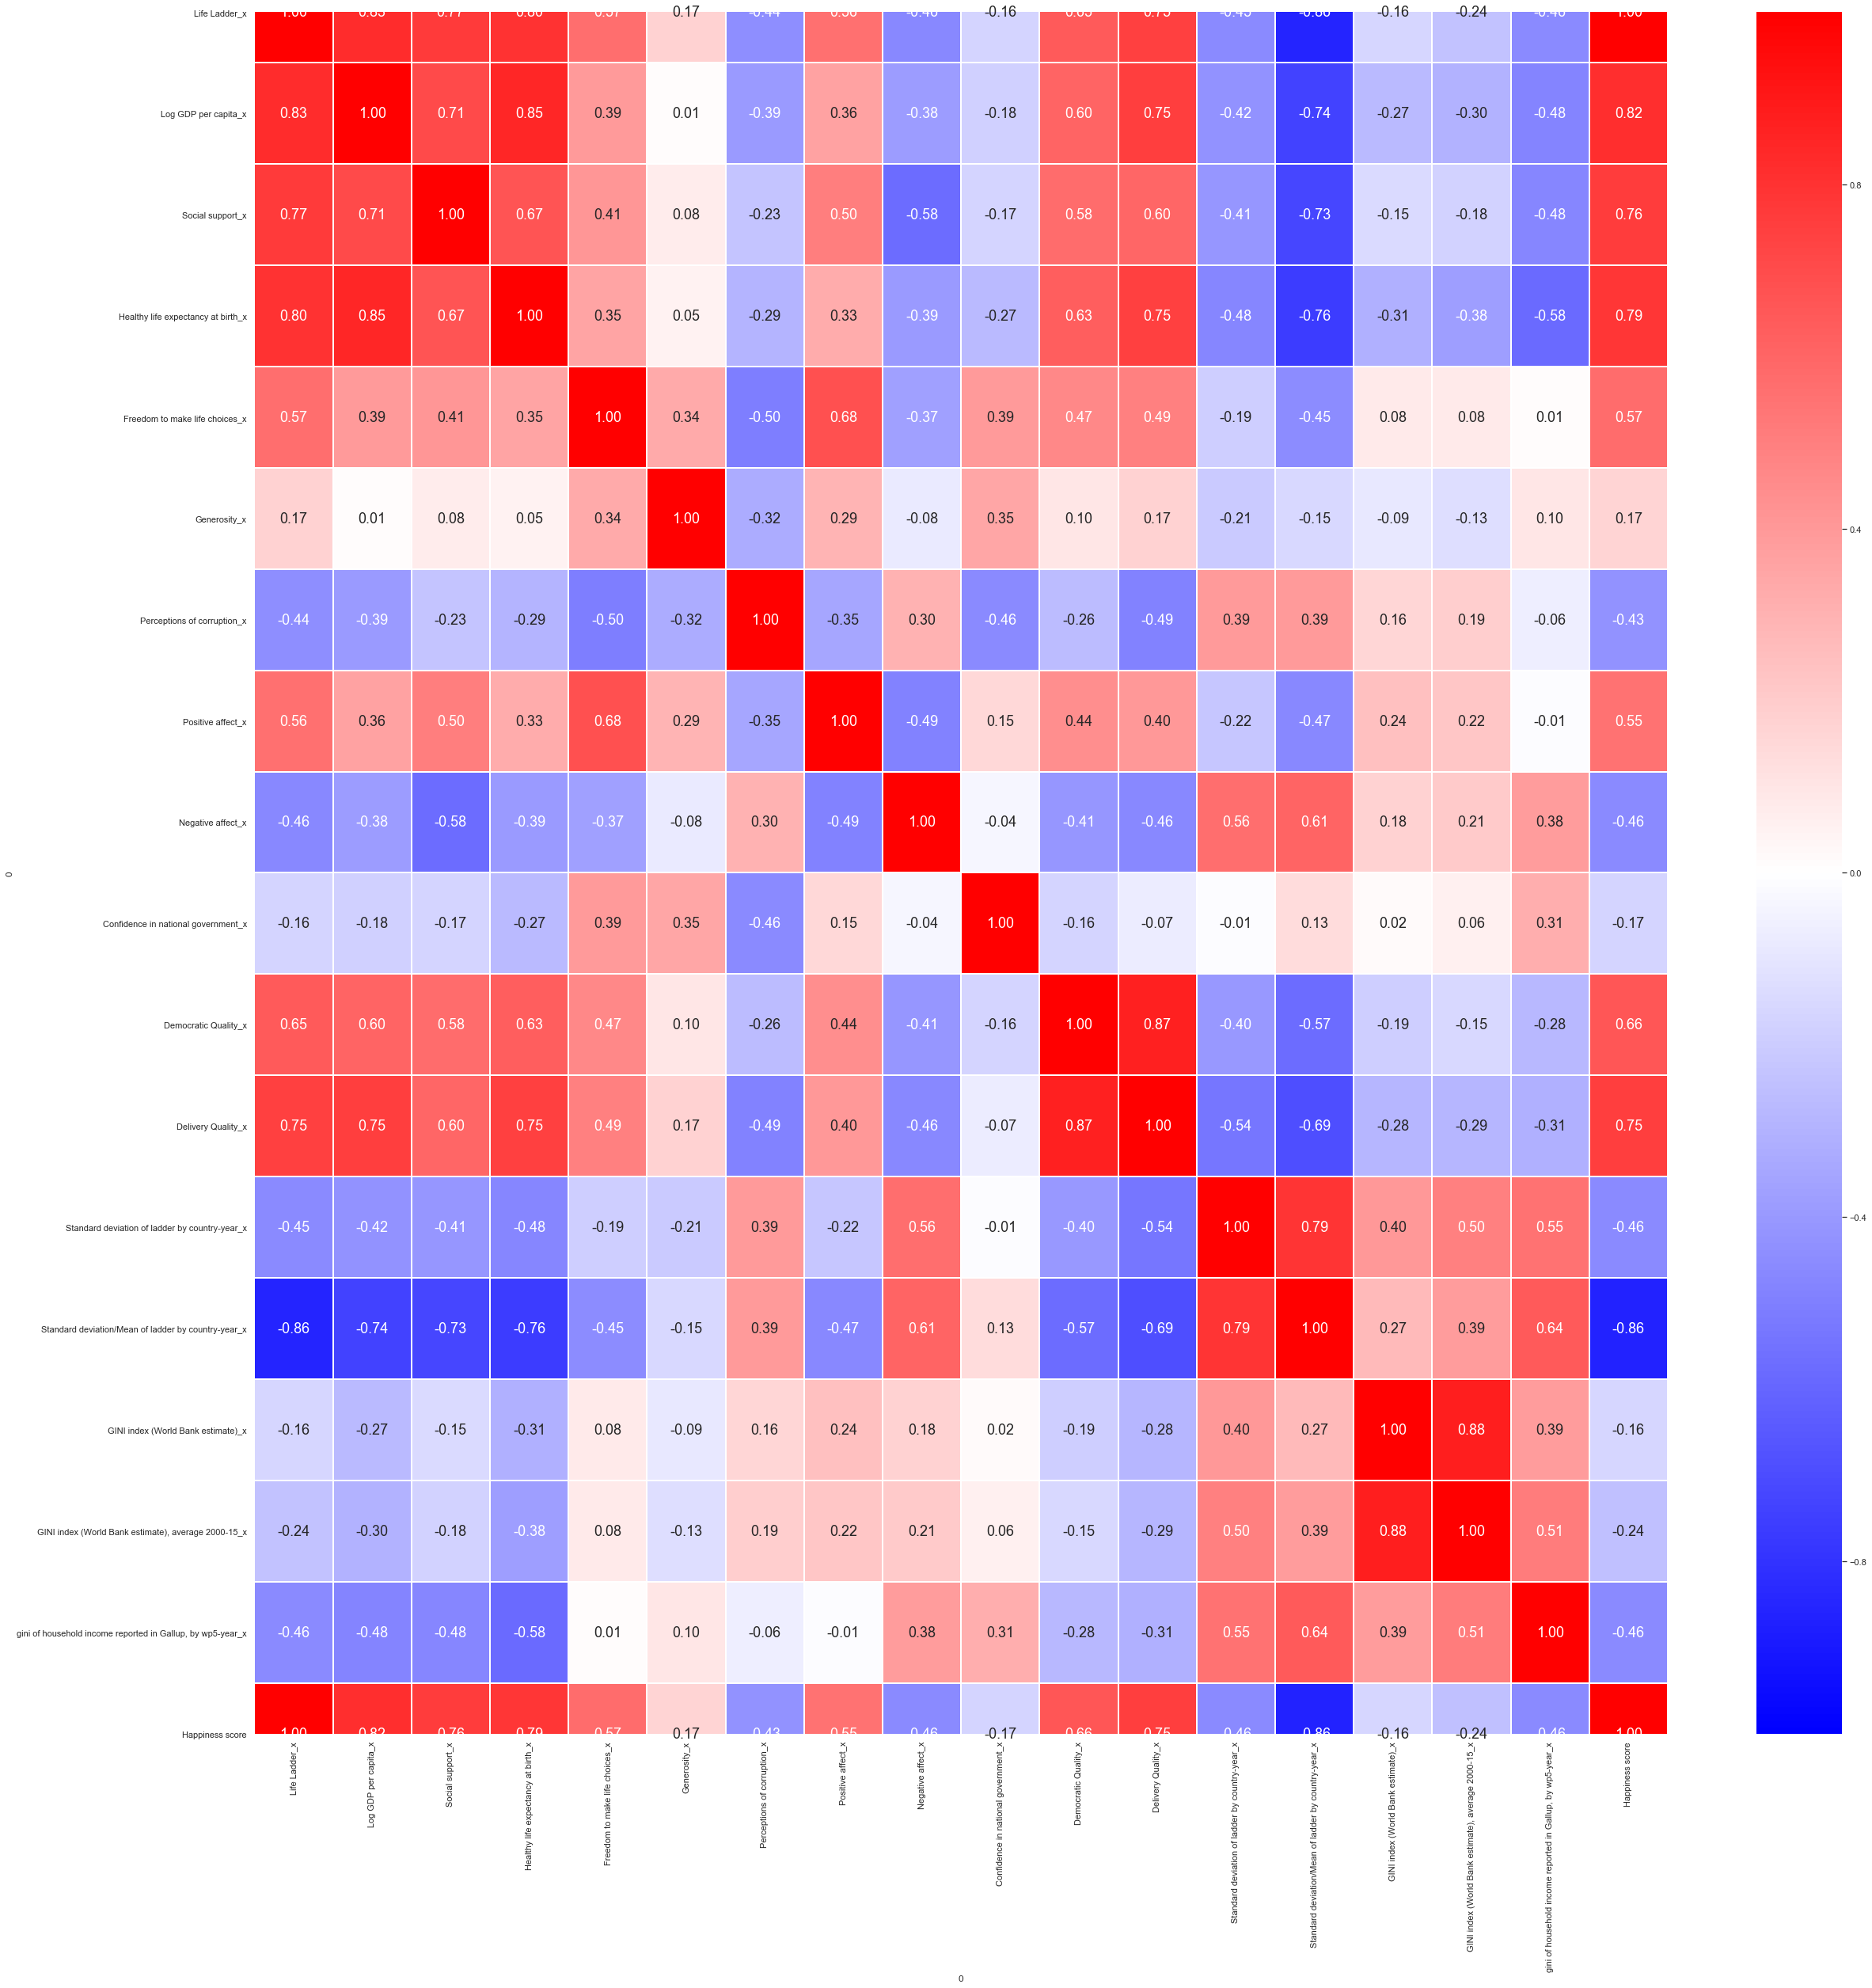

In [51]:
f,axes = plt.subplots(1,1,figsize = (40,40))
sb.heatmap(data_corr.corr(), vmin = -1, vmax = 1, linewidths = 1, annot = True, fmt = ".2f", annot_kws={"size":18}, cmap = "bwr")

#### Top factors that are highly correlated to Happiness Score:
- Life Ladder: 1.00
- Log GDP Per Capita: 0.82
- Healthy Life Expectancy: 0.79
- Social Support: 0.76
- Delievery Quality: 0.75

## 2. Graph and plots across all variables

In [52]:
data_plots = data_corr.copy()
data_plots = data_plots.drop(columns = "country")

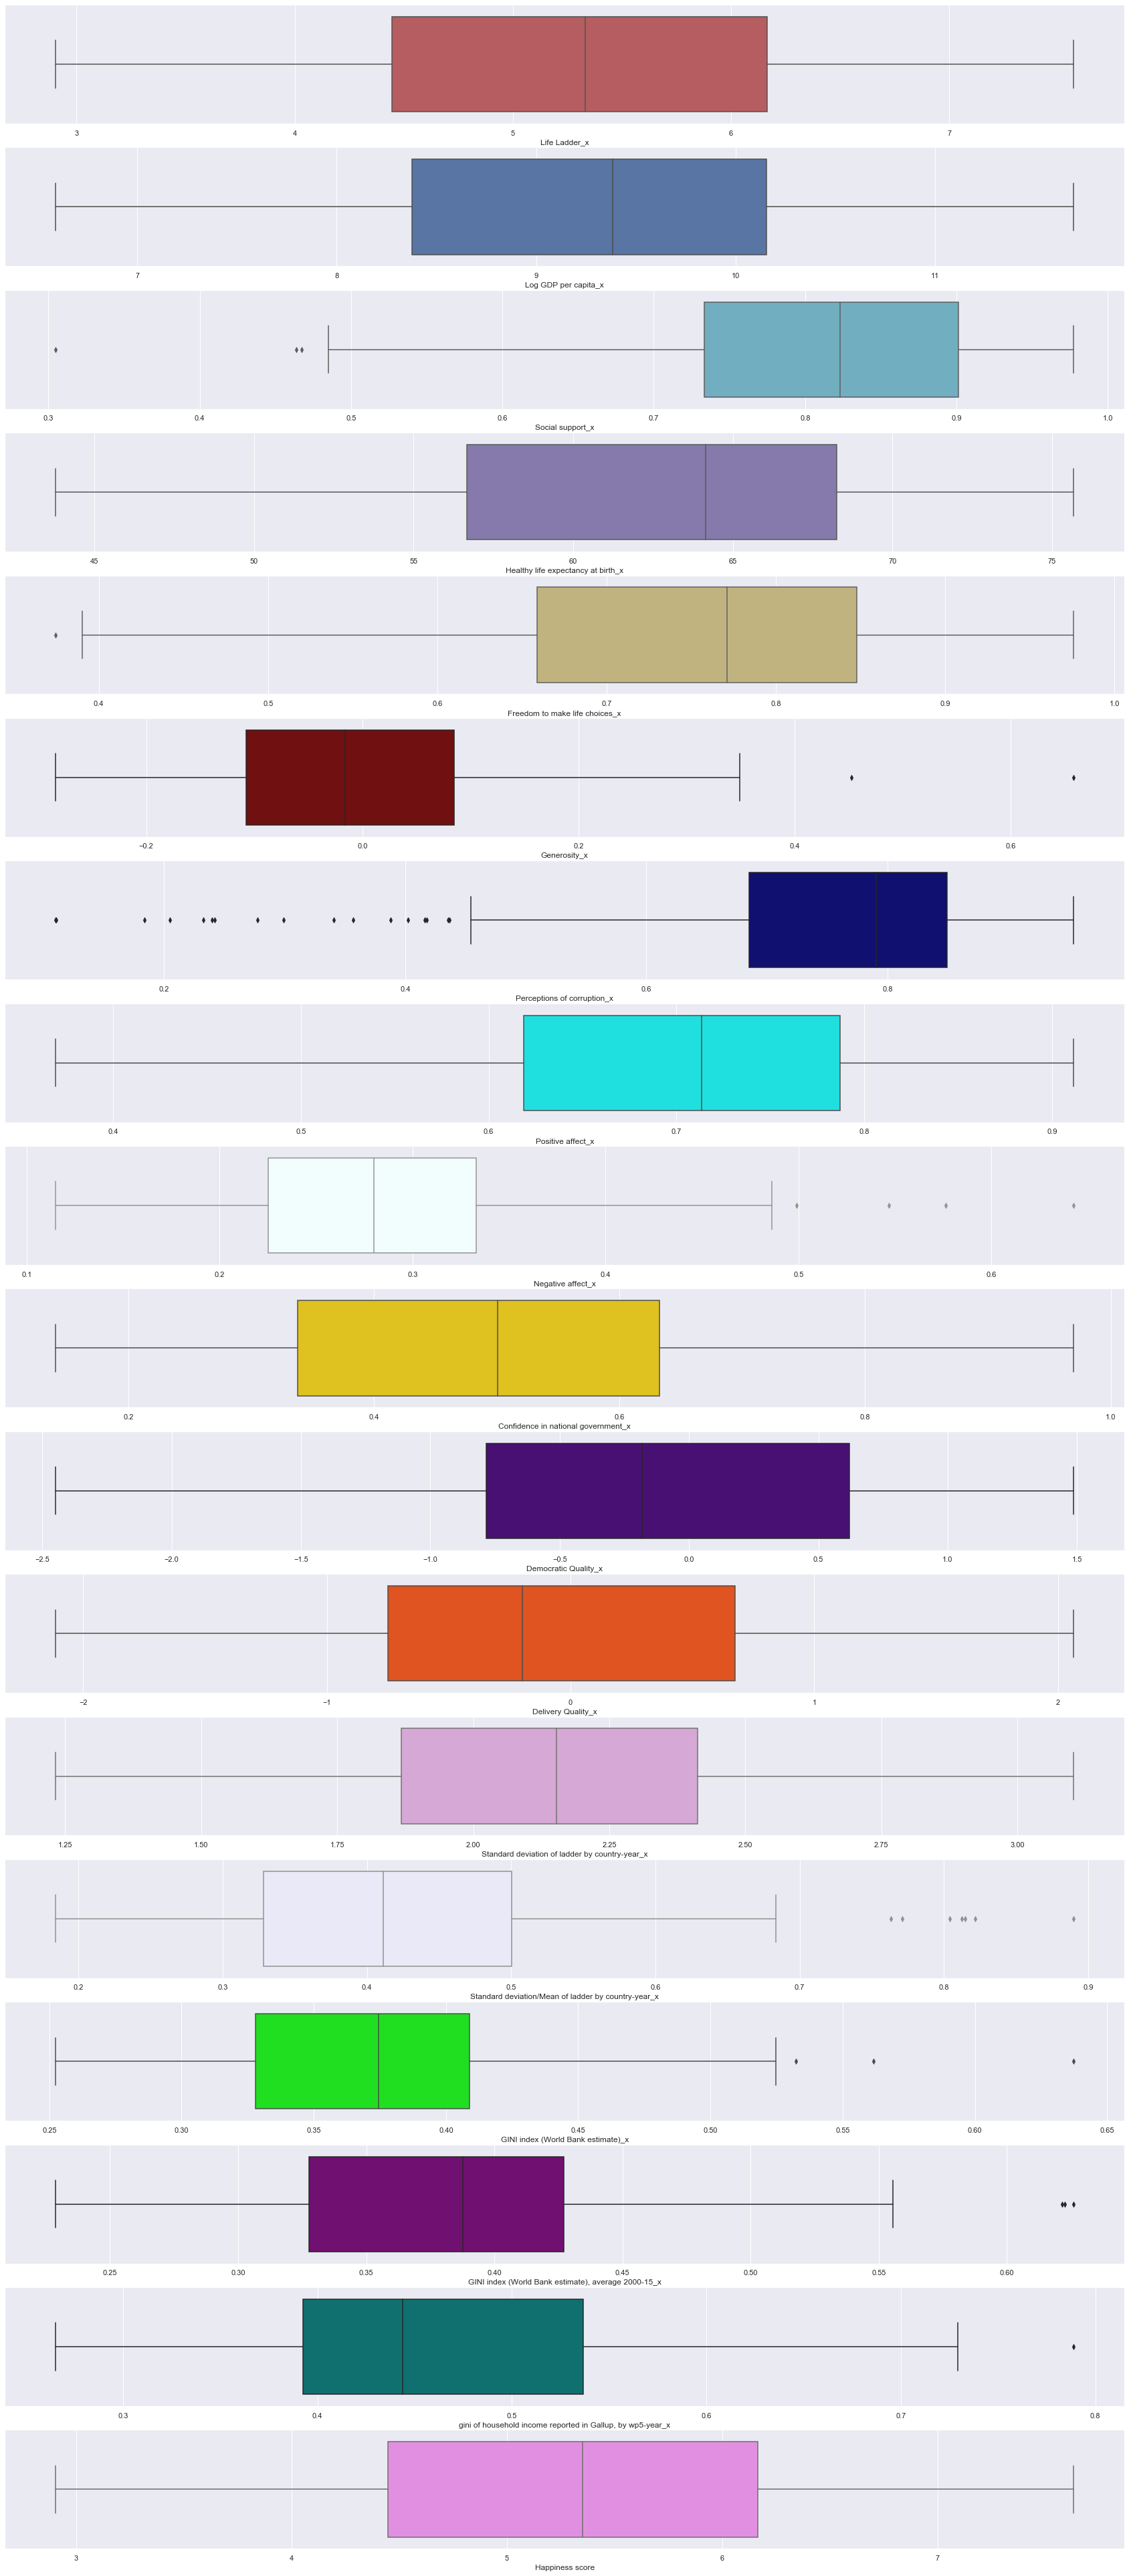

In [53]:
#Box Plot
f, axes = plt.subplots(18, 1, figsize = (30,70))
colors = ["r","b","c", "m", "y", "maroon","navy", "aqua", "azure","gold", "indigo", "orangered", "plum", "lavender", "lime", "purple", "teal", "violet"]

count = 0
for var in data_plots:
    sb.boxplot(data_plots[var], orient = "h", color = colors[count], ax = axes[count])
    count += 1
plt.show()

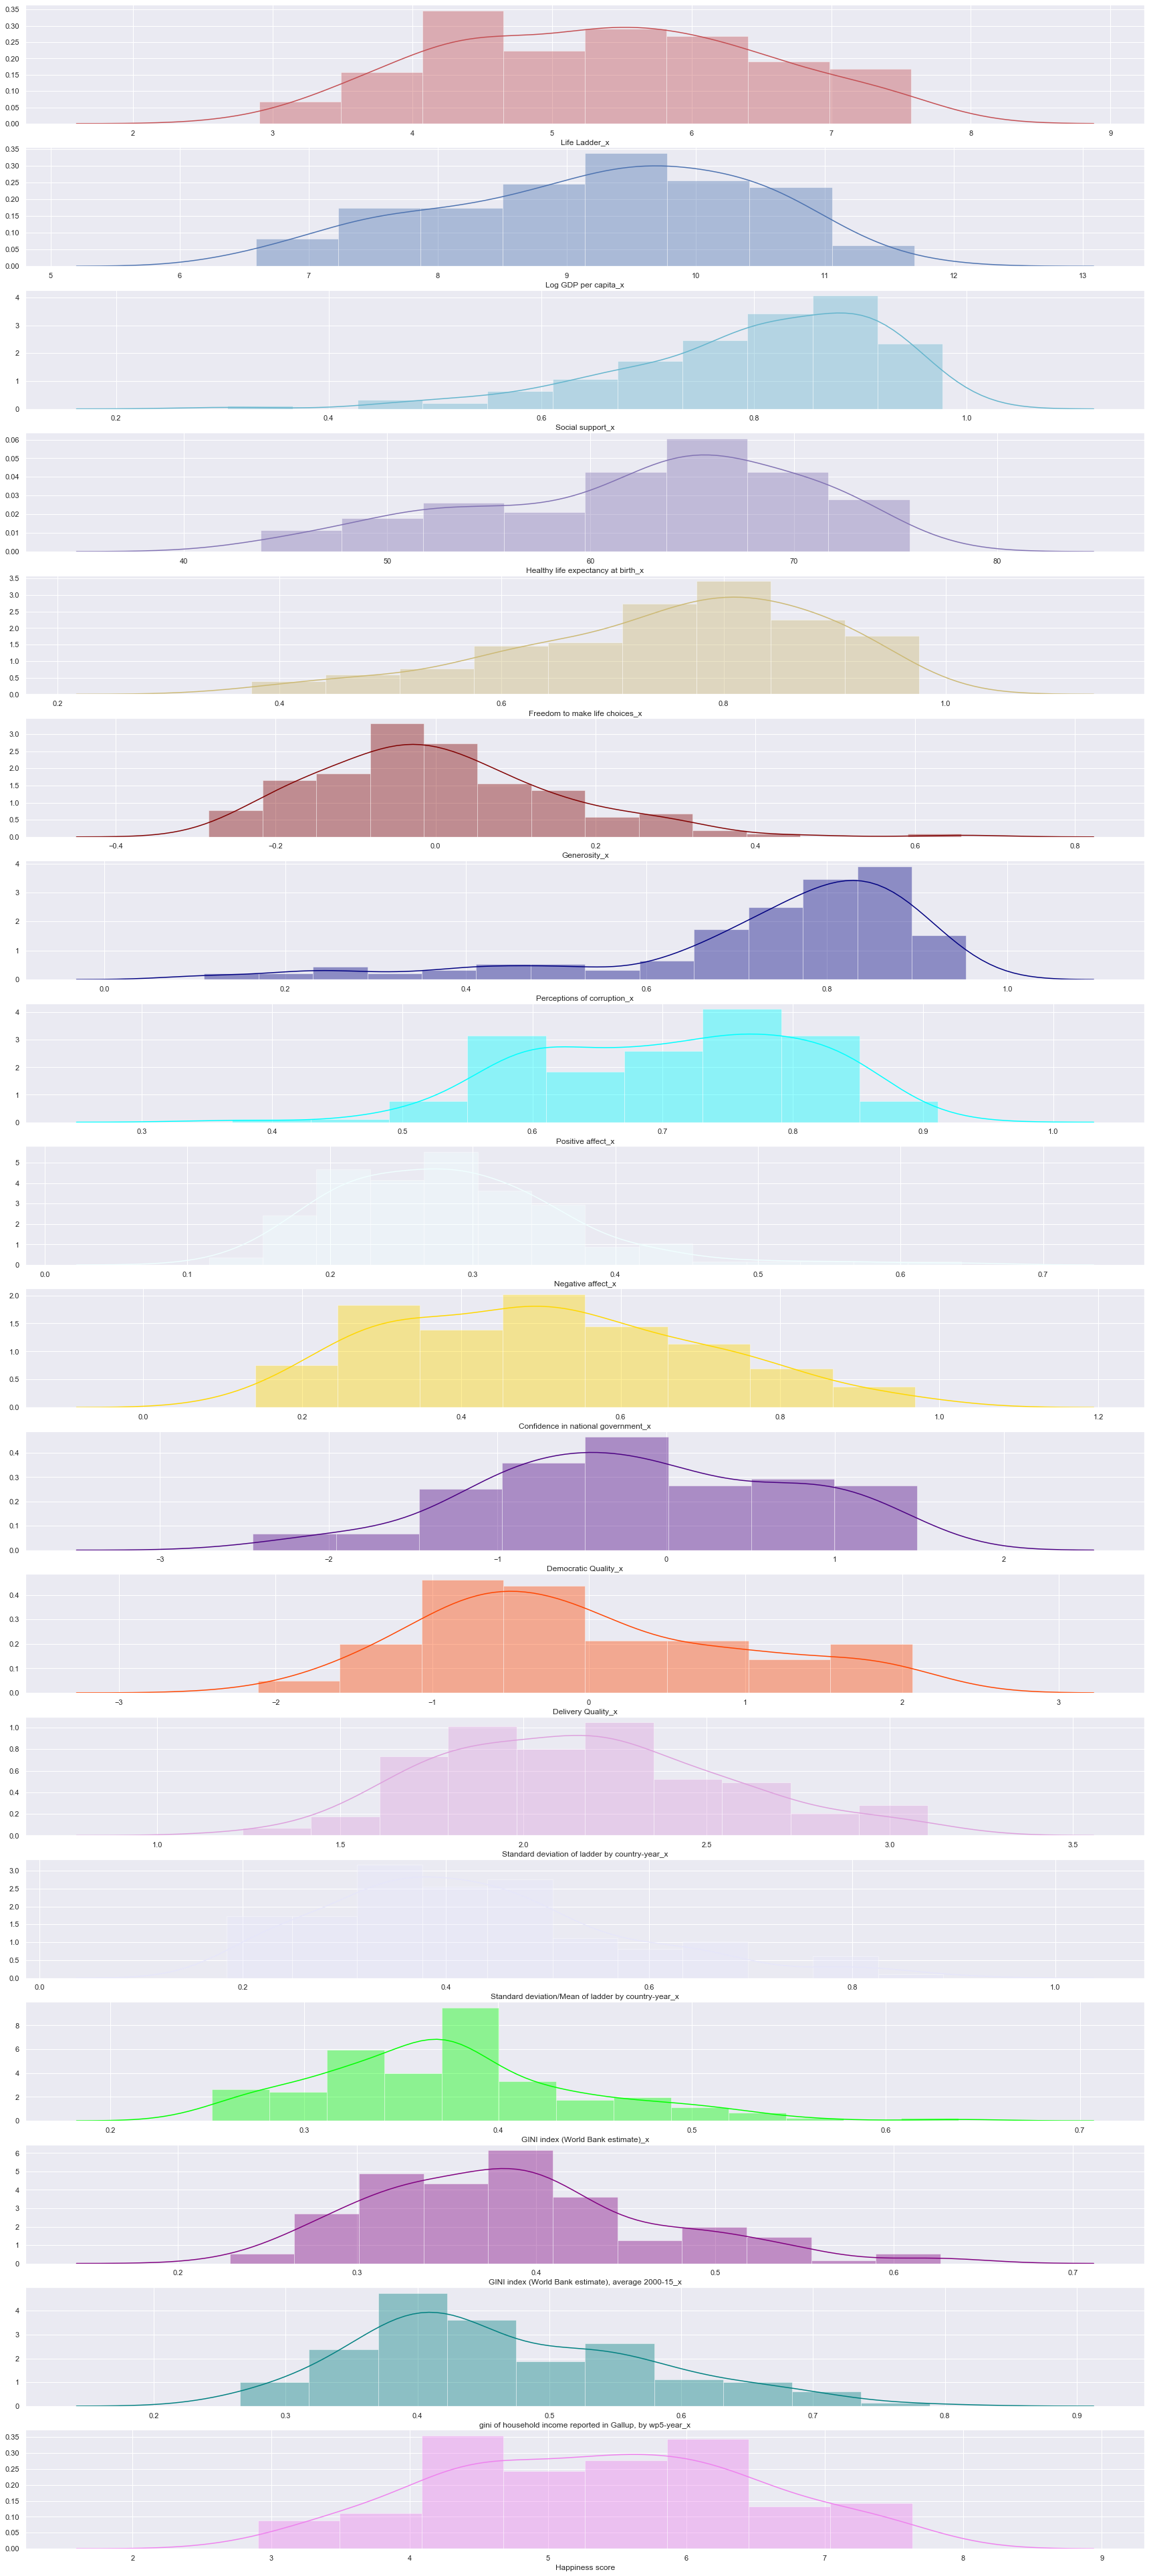

In [54]:
#Histogram and KDE
f, axes = plt.subplots(18, 1, figsize = (30,70))
colors = ["r","b","c", "m", "y", "maroon","navy", "aqua", "azure","gold", "indigo", "orangered", "plum", "lavender", "lime", "purple", "teal", "violet"]

count = 0
for var in data_plots:
    sb.distplot(data_plots[var], color = colors[count], ax = axes[count])
    count += 1
plt.show()

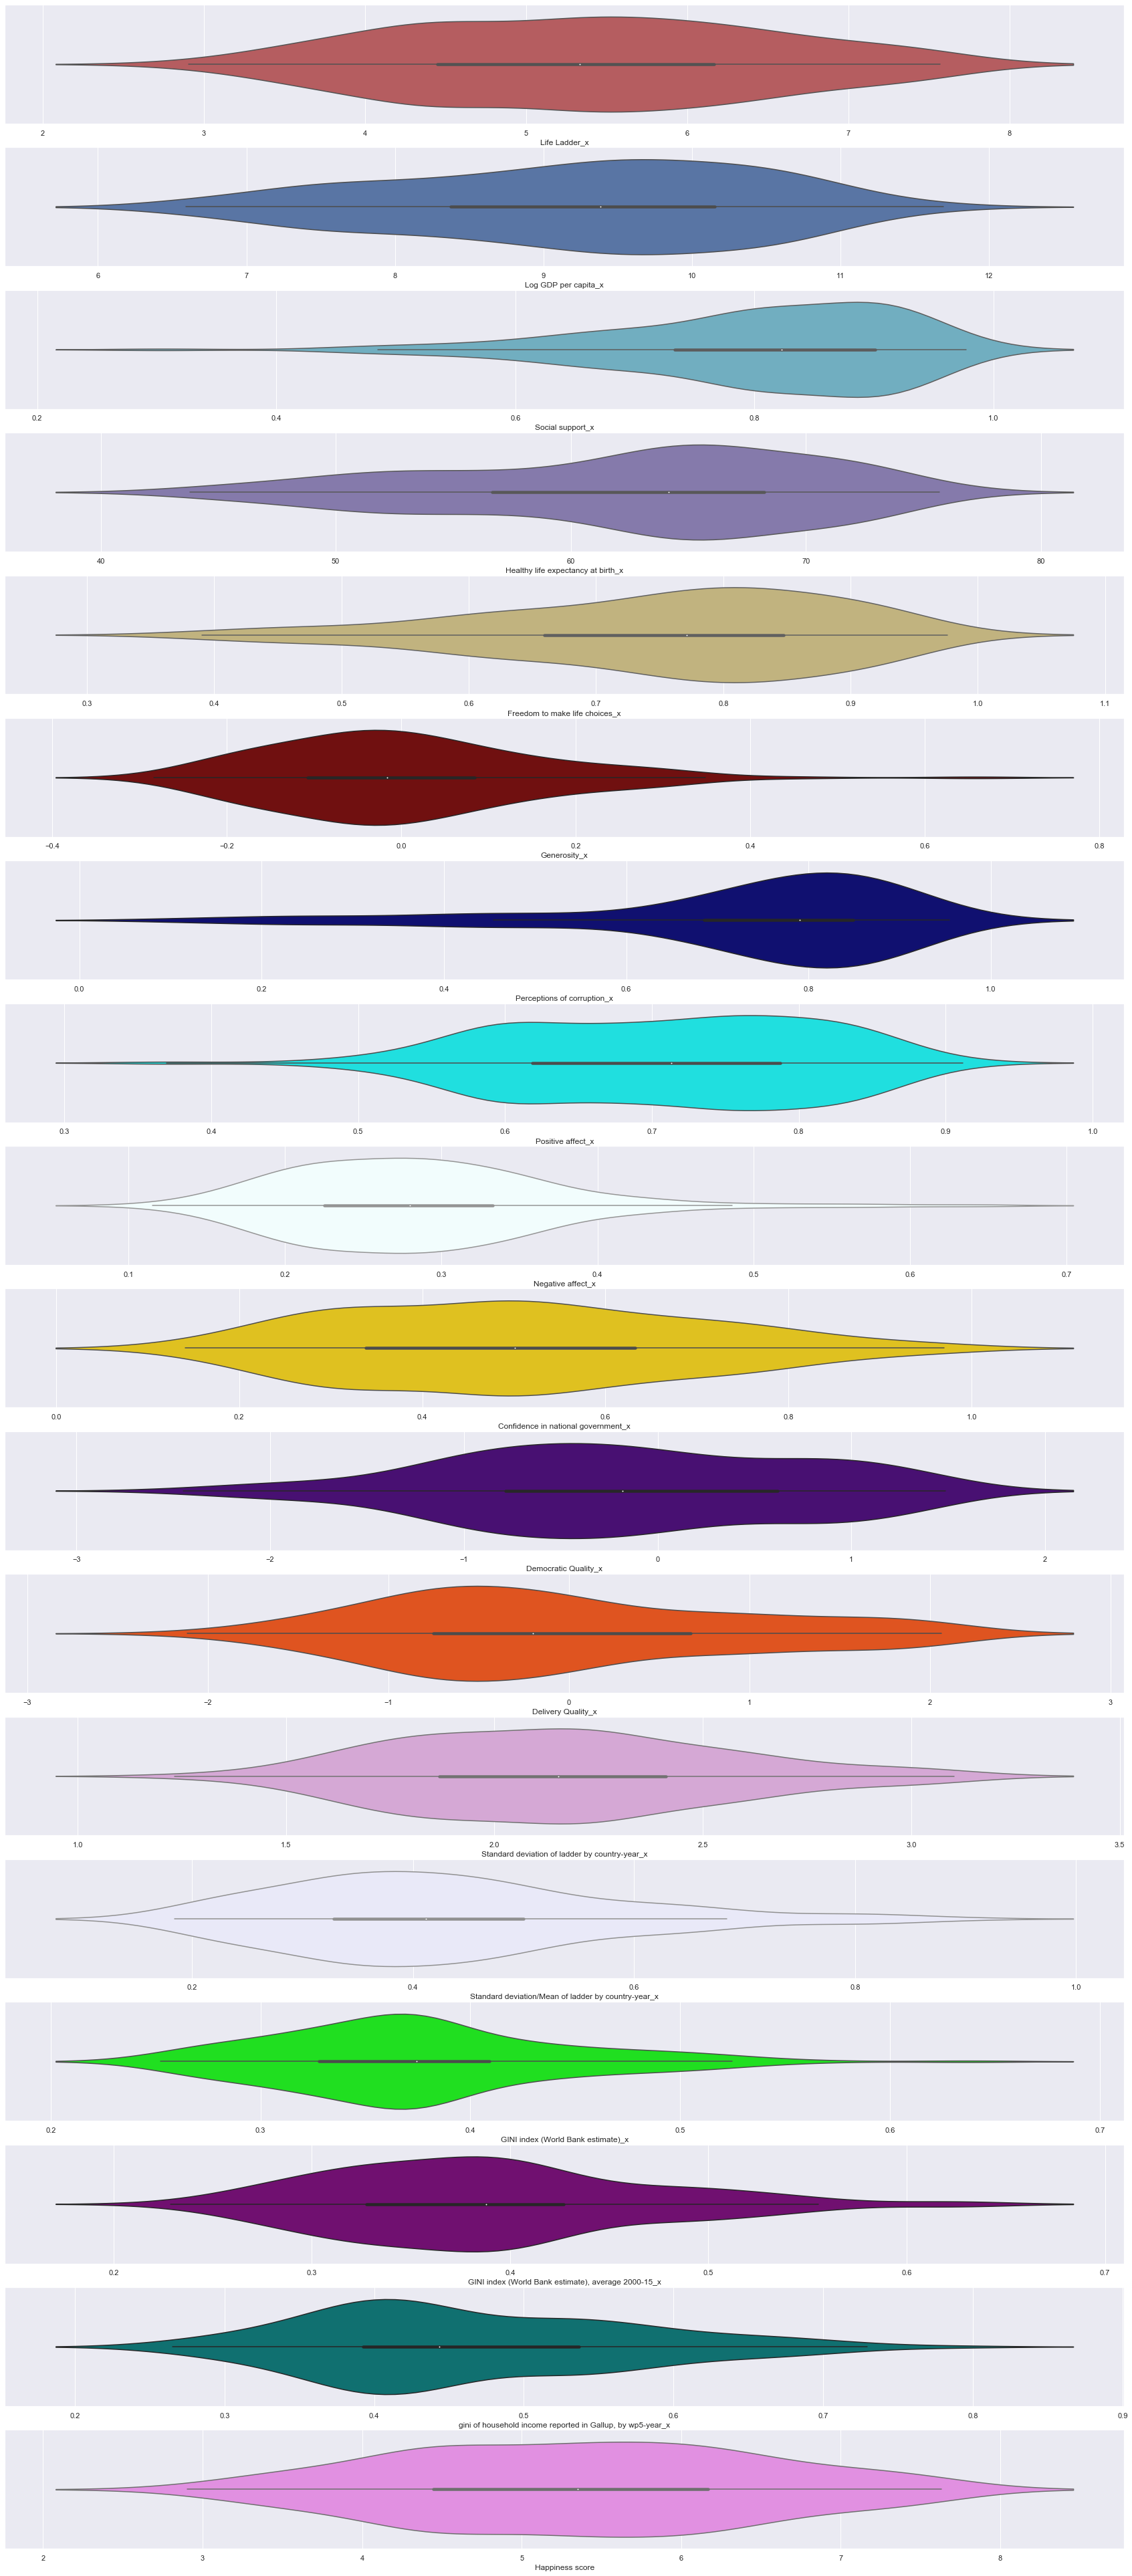

In [55]:
#Violin Plot
f, axes = plt.subplots(18, 1, figsize = (30,70))
colors = ["r","b","c", "m", "y", "maroon","navy", "aqua", "azure","gold", "indigo", "orangered", "plum", "lavender", "lime", "purple", "teal", "violet"]
count = 0
for var in data_plots:
    sb.violinplot(data_plots[var], color = colors[count], ax = axes[count])
    count += 1
plt.show()

## 3. Exploring Happiness Score against other variables using plotly

In [56]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [98]:
whrdata= data_corr.copy()
whrdata

0        country  Life Ladder_x  Log GDP per capita_x  Social support_x  \
0    Afghanistan       3.498909              7.468086          0.526029   
1        Albania       4.642766              9.323155          0.635263   
2        Algeria       5.648221              9.530207          0.791177   
3         Angola       3.794838              8.741957          0.754615   
4      Argentina       6.458699              9.841867          0.908470   
..           ...            ...                   ...               ...   
148    Venezuela       5.248671              9.638375          0.905664   
149      Vietnam       5.099696              8.666449          0.836092   
150        Yemen       3.507456              8.013866          0.717974   
151       Zambia       4.367331              8.201803          0.727127   
152     Zimbabwe       3.815336              7.548955          0.756053   

0    Healthy life expectancy at birth_x  Freedom to make life choices_x  \
0                             51.855027                        0.461755   
1                             68.781881                        0.729482   
2                             65.446287                        0.503155   
3                             52.460709                        0.374542   
4                             67.328417                        0.826487   
..                                  ...                             ...   
148                           64.603157                        0.513241   
149                           65.990576                        0.877446   
150                           54.704479                        0.600511   
151                           52.998837                        0.801305   
152                           51.362860                        0.698756   

0    Generosity_x  Perceptions of corruption_x  Positive affect_x  \
0        0.040999                     0.874880           0.536636   
1       -0.043963                     0.886176           0.679441   
2       -0.203714                     0.674243           0.642798   
3       -0.157882                     0.834076           0.578517   
4       -0.179273                     0.849269           0.841749   
..            ...                          ...                ...   
148     -0.204171                     0.843252           0.788729   
149      0.003684                     0.785861           0.627870   
150     -0.151890                     0.845251           0.510637   
151      0.043062                     0.797511           0.699343   
152     -0.067939                     0.776374           0.746089   

0    Negative affect_x  Confidence in national government_x  \
0             0.358449                             0.313943   
1             0.335140                             0.466103   
2             0.280896                             0.500960   
3             0.367864                             0.572346   
4             0.286658                             0.378031   
..                 ...                                  ...   
148           0.285998                             0.193153   
149           0.226348                             0.848363   
150           0.280005                             0.280899   
151           0.367136                             0.662834   
152           0.212645                             0.634553   

0    Democratic Quality_x  Delivery Quality_x  \
0               -1.860013           -1.380474   
1                0.211621           -0.185012   
2               -1.033700           -0.791618   
3               -0.739363           -1.168539   
4                0.240345           -0.493248   
..                    ...                 ...   
148             -1.027479           -1.645637   
149             -0.646965           -0.324656   
150             -2.049012           -1.358738   
151              0.027598           -0.430600   
152             -0.973937           -1.445343   

0    Standard deviation

### We would like to take a look at the happiness score around the world
**An interactive map using `Choropleth` is used to see the distribution of happiness in the world**

In [58]:
trace1 = go.Choropleth(
            locations = whrdata['country'],
            locationmode='country names',
            z = whrdata['Happiness score'],
            text = whrdata['country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'rainbow',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Happiness score',
                tickprefix = '')
        )

data = [trace1]
layout = go.Layout(
    title = 'Country Happiness score',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

From the map, we can see that Africa has lower Happiness Score.

In [59]:
def draw_map(dataset, title, colorscale, reversescale=False):
    trace2 = go.Choropleth(
                locations = whrdata['country'],
                locationmode='country names',
                z = whrdata['Happiness score'],
                text = whrdata['country'],
                autocolorscale =False,
                reversescale = reversescale,
                colorscale = colorscale,
                marker = dict(
                    line = dict(
                        color = 'rgb(0,0,0)',
                        width = 0.5)
                ),
                colorbar = dict(
                    title = 'Happiness Score',
                    tickprefix = '')
            )

    data = [trace2]
    layout = go.Layout(
        title = title,
        geo = dict(
            showframe = True,
            showlakes = False,
            showcoastlines = True,
            projection = dict(
                type = 'orthographic'
            )
        )
    )
    fig = dict( data=data, layout=layout )
    iplot(fig)
    
draw_map(whrdata, 'Country Happiness Score', "Reds")

**An interactive `ScatterPlot` is used to see correlation with variables**

In [60]:
trace3 = go.Scatter(
    x = whrdata['Log GDP per capita_x'],
    y = whrdata['Happiness score'],
    name="Happiness Score per year",
    marker=dict(
        color="Blue",
    ),
    mode = "markers"
)
data = [trace3]
layout = dict(title = 'Happiness Score per GDP per capita',
          xaxis = dict(title = 'Log GDP per capita_x', showticklabels=True), 
          yaxis = dict(title = 'Happiness score'),
          hovermode = 'closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig)

# K-Means Clustering 

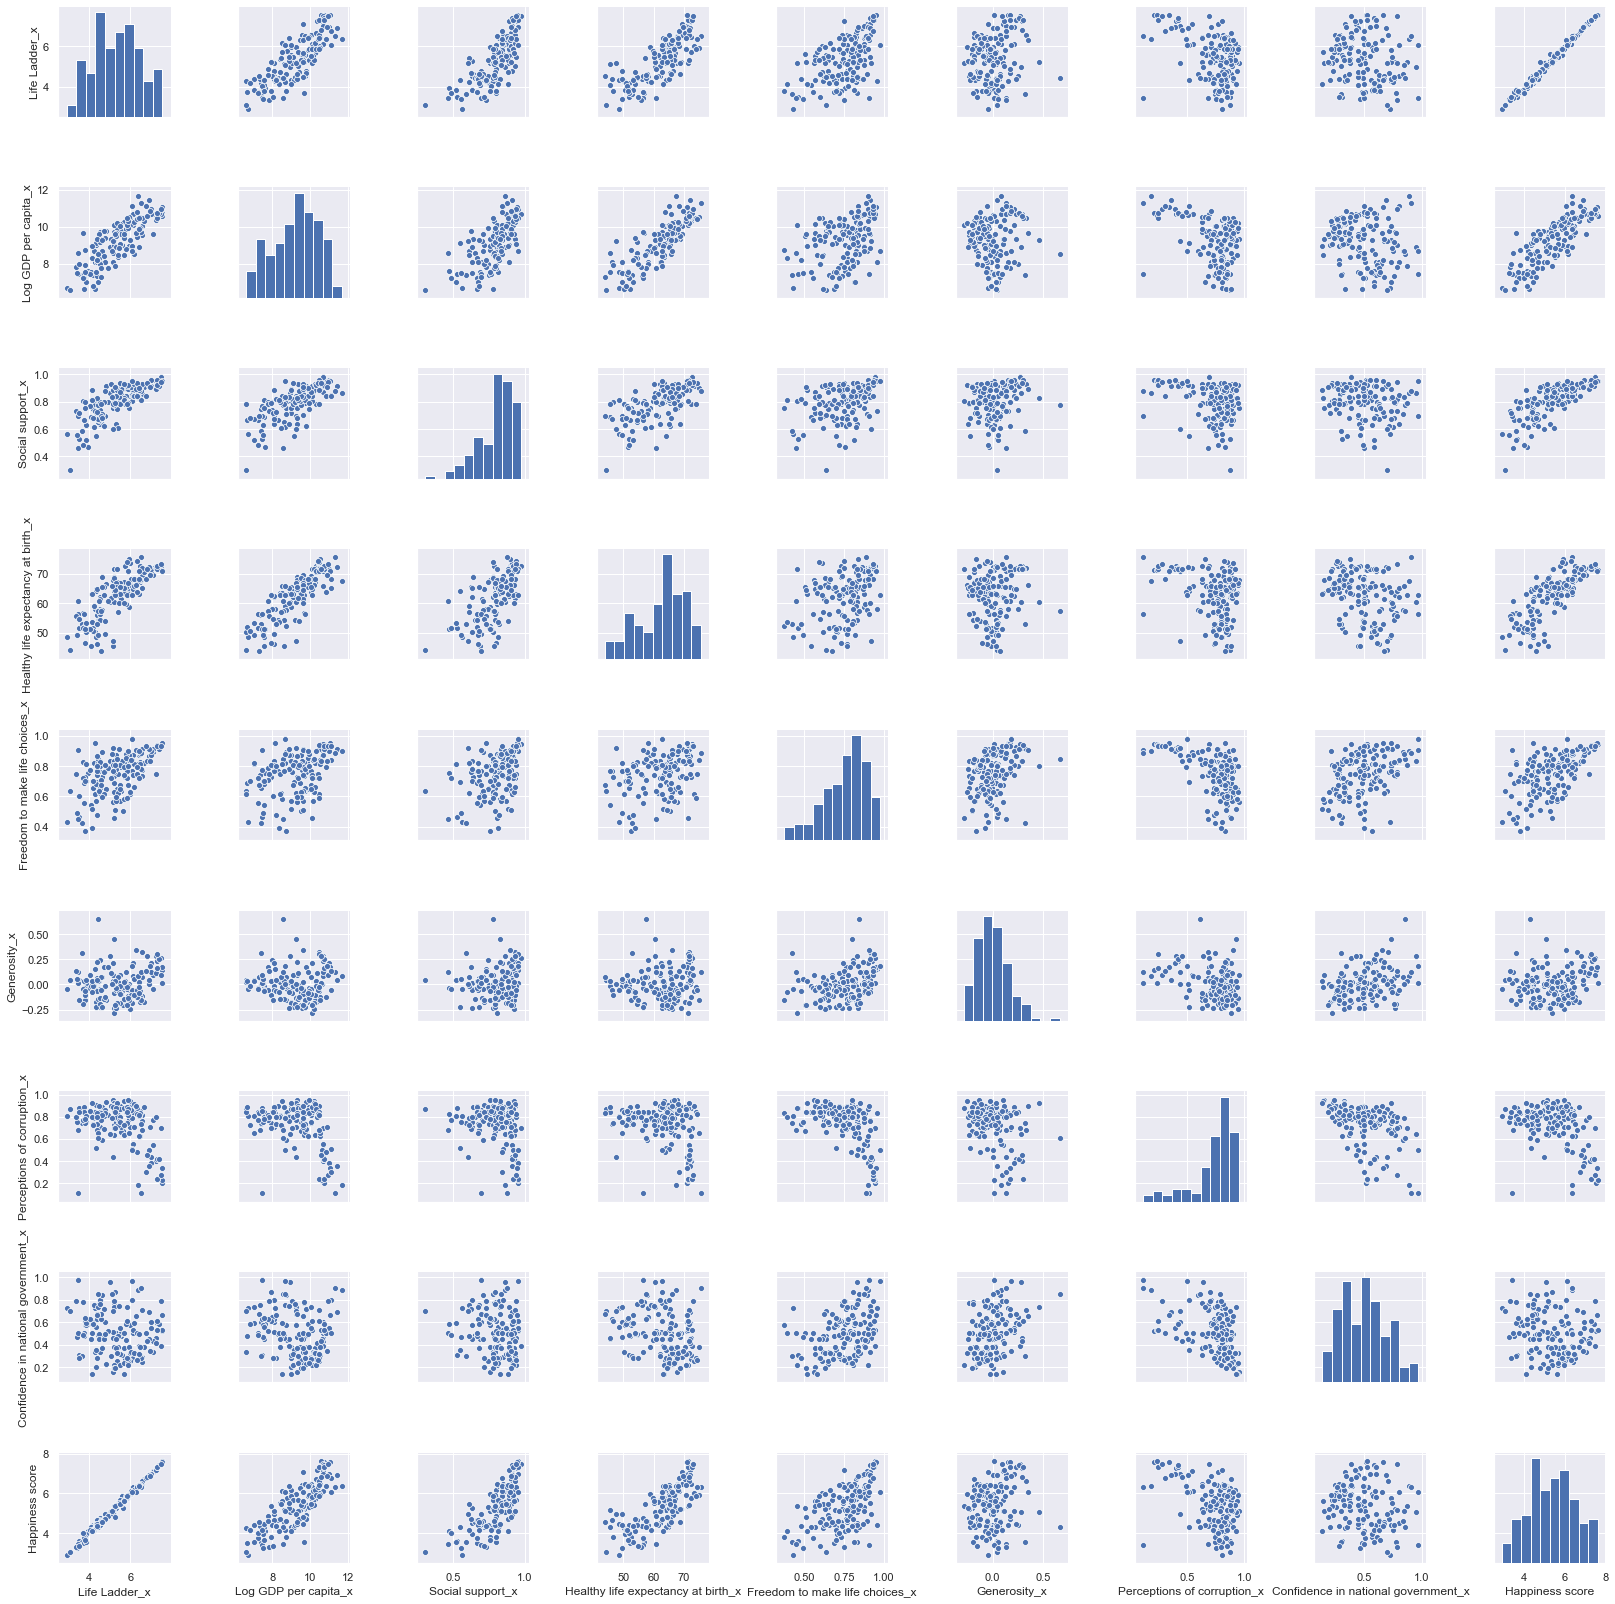

In [61]:
# Extract the Features from the Data
X = pd.DataFrame(cleandata[["Life Ladder_x", "Log GDP per capita_x", "Social support_x", "Healthy life expectancy at birth_x", "Freedom to make life choices_x", "Generosity_x", "Perceptions of corruption_x", "Confidence in national government_x", "Happiness score"]]) 

# Plot the Raw Data on 2D grids
sb.pairplot(X)

In [62]:
# Import essential models from sklearn
from sklearn.cluster import KMeans

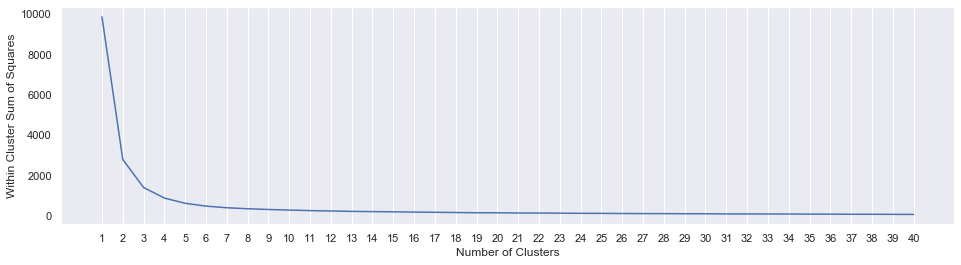

In [63]:
# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()


In [64]:
# Set "optimal" Clustering Parameters
num_clust = 3
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Features 	LL 	GDP 	SS 	Birth 	FTMLC 	G 	POC 	Conf 	HS

Cluster 0:	5.41	9.35	0.82	64.0	0.74	-0.03	0.78	0.48	5.4	
Cluster 1:	4.14	7.88	0.69	52.29	0.7	0.01	0.77	0.58	4.16	
Cluster 2:	6.57	10.47	0.89	71.15	0.83	0.04	0.61	0.45	6.58	

Within Cluster Sum of Squares : 1403.554694046234



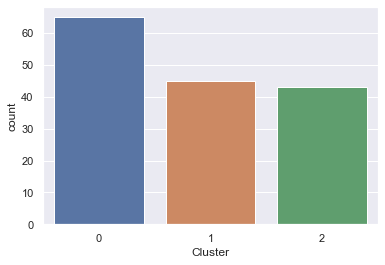

In [65]:
# Print the Cluster Centers
print("Features", "\tLL", "\tGDP", "\tSS", "\tBirth", "\tFTMLC", "\tG", "\tPOC", "\tConf", "\tHS")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

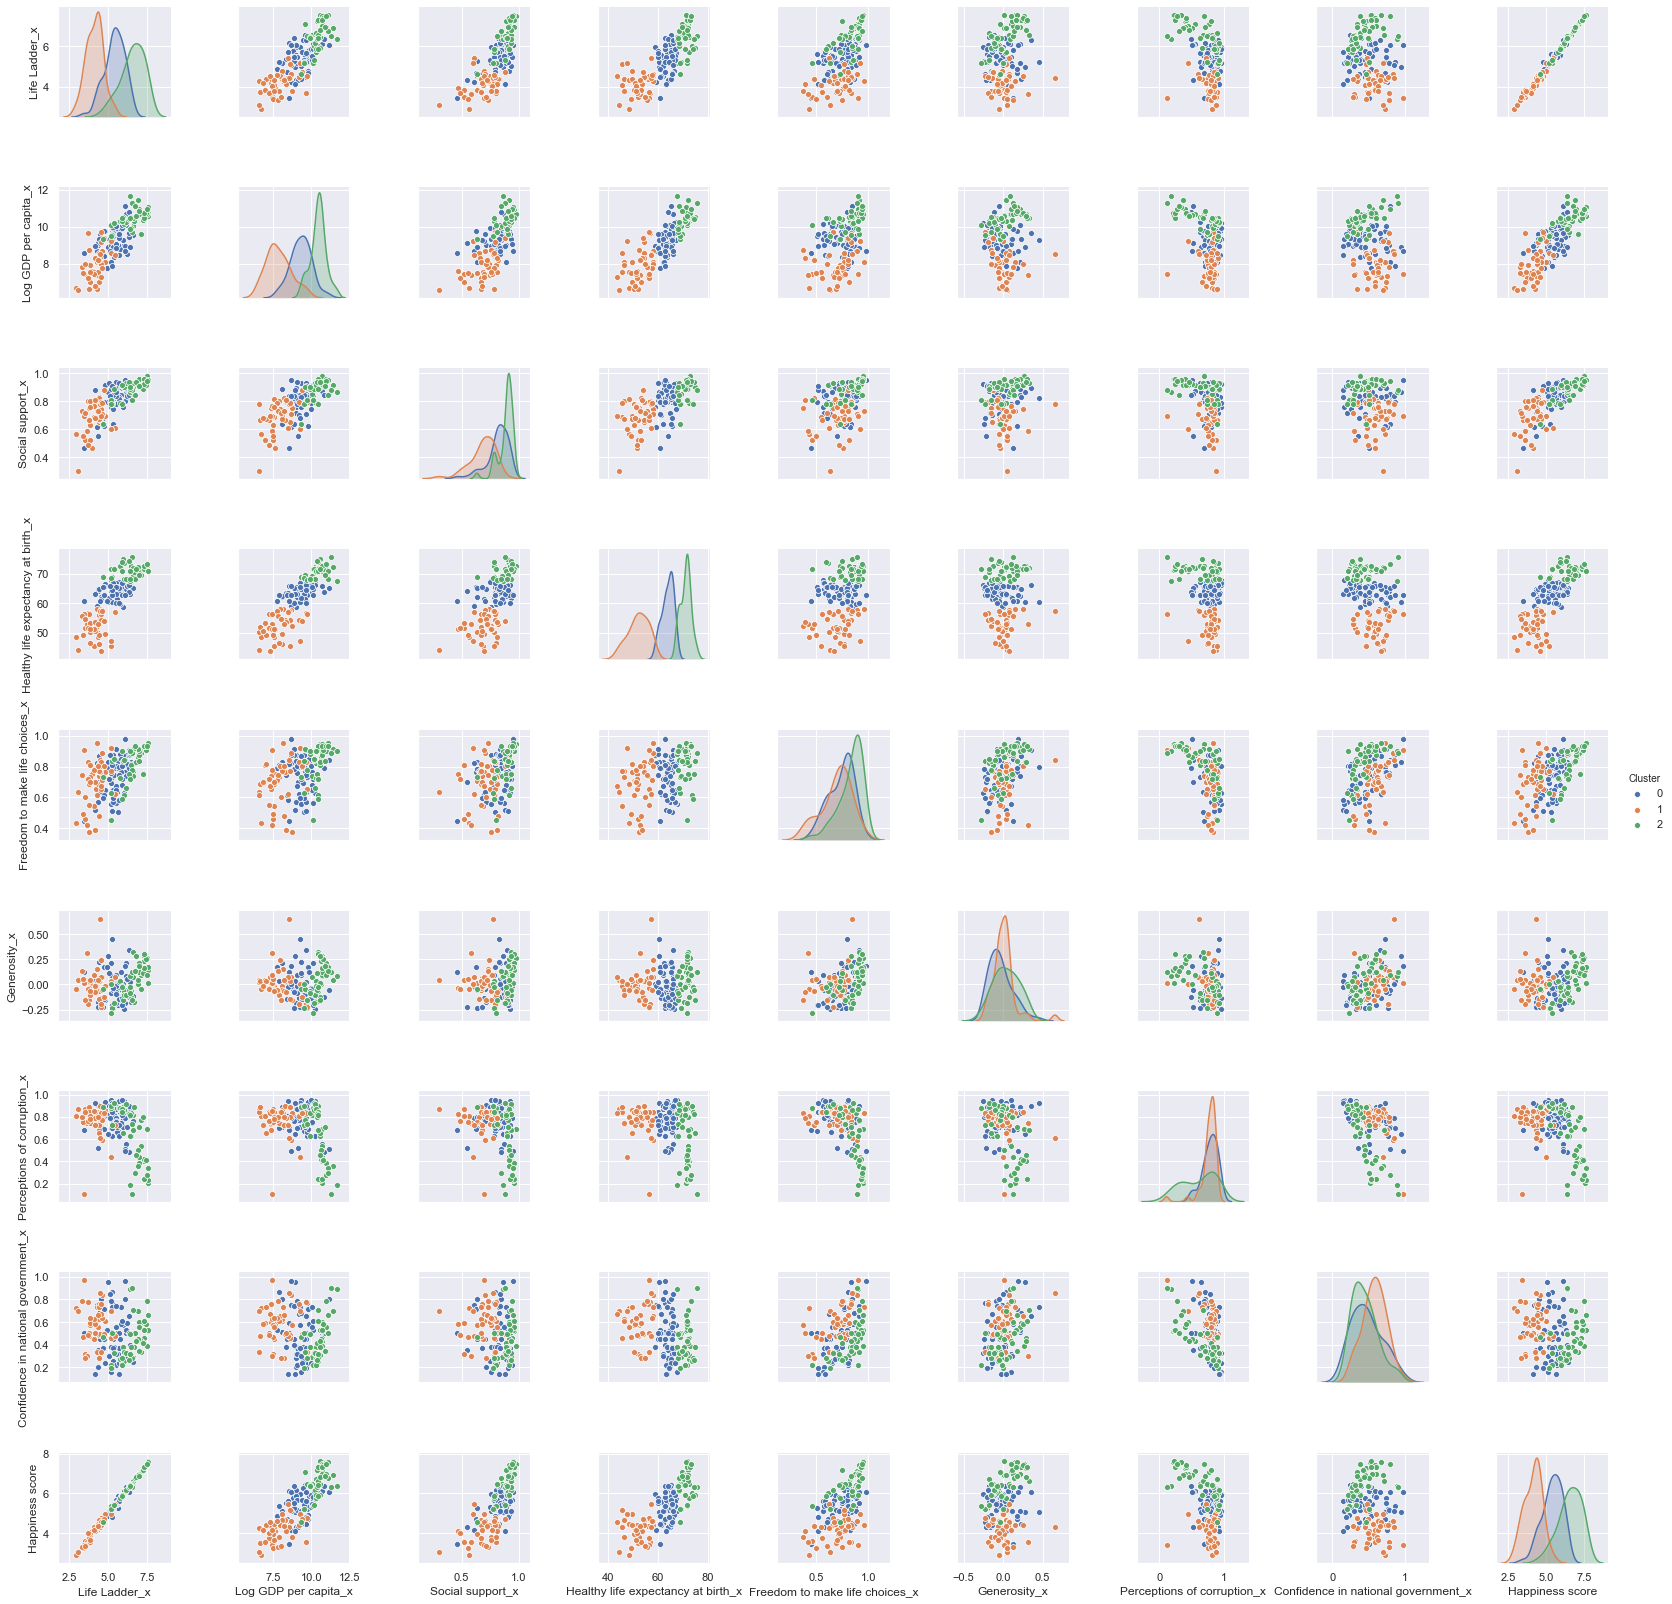

In [66]:
# Plot the Clusters on 2D grids
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Cluster")

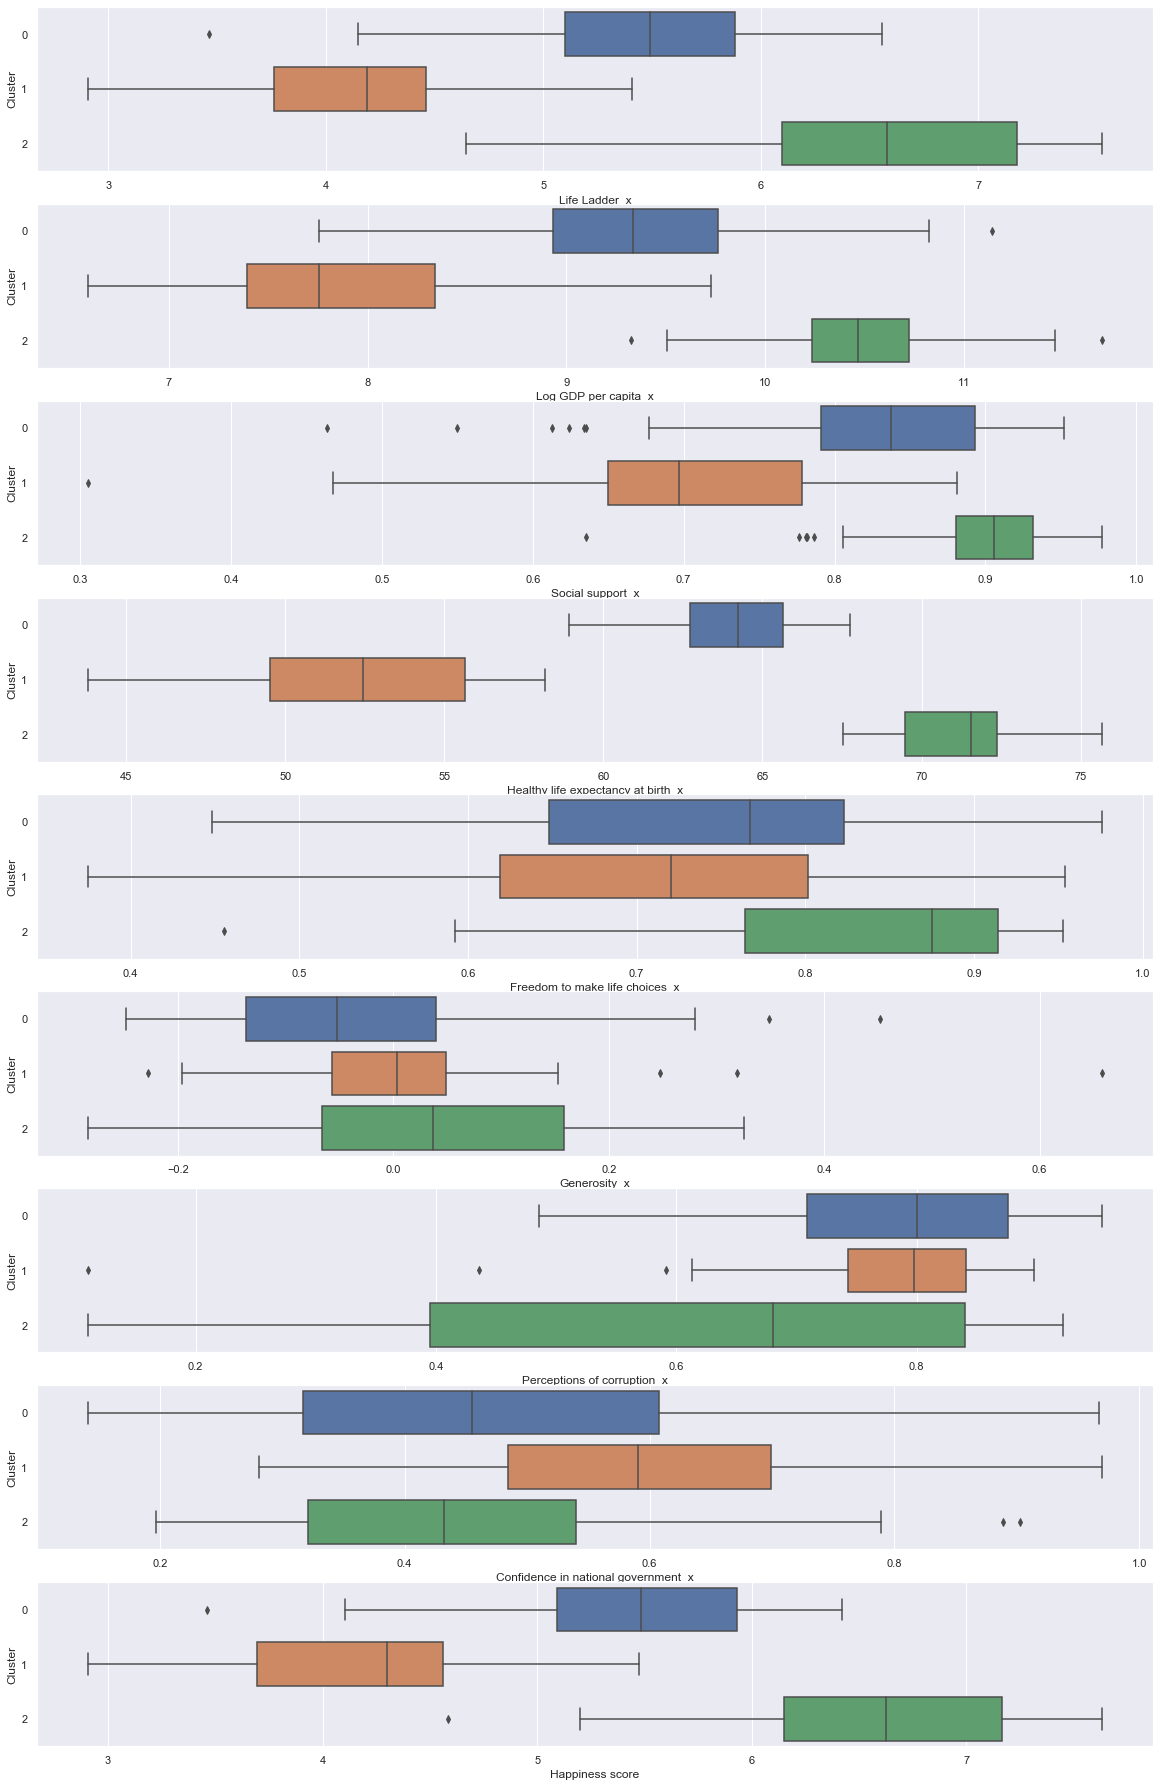

In [67]:
# Boxplots for all Features against the Clusters
f, axes = plt.subplots(9, 1, figsize=(20,32))
sb.boxplot(x = 'Life Ladder_x', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'Log GDP per capita_x', y = 'Cluster', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'Social support_x', y = 'Cluster', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'Healthy life expectancy at birth_x', y = 'Cluster', data = X_labeled, ax = axes[3])
sb.boxplot(x = 'Freedom to make life choices_x', y = 'Cluster', data = X_labeled, ax = axes[4])
sb.boxplot(x = 'Generosity_x', y = 'Cluster', data = X_labeled, ax = axes[5])
sb.boxplot(x = 'Perceptions of corruption_x', y = 'Cluster', data = X_labeled, ax = axes[6])
sb.boxplot(x = 'Confidence in national government_x', y = 'Cluster', data = X_labeled, ax = axes[7])
sb.boxplot(x = 'Happiness score', y = 'Cluster', data = X_labeled, ax = axes[8])

# Detecting Anomalies

In [68]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

LocalOutlierFactor(algorithm='auto', contamination=0.05, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=False, p=2)

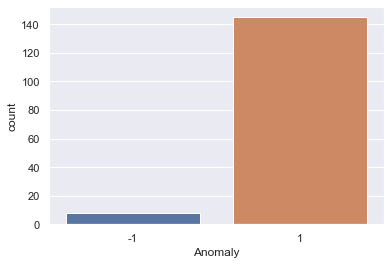

In [69]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(X_labeled["Anomaly"])

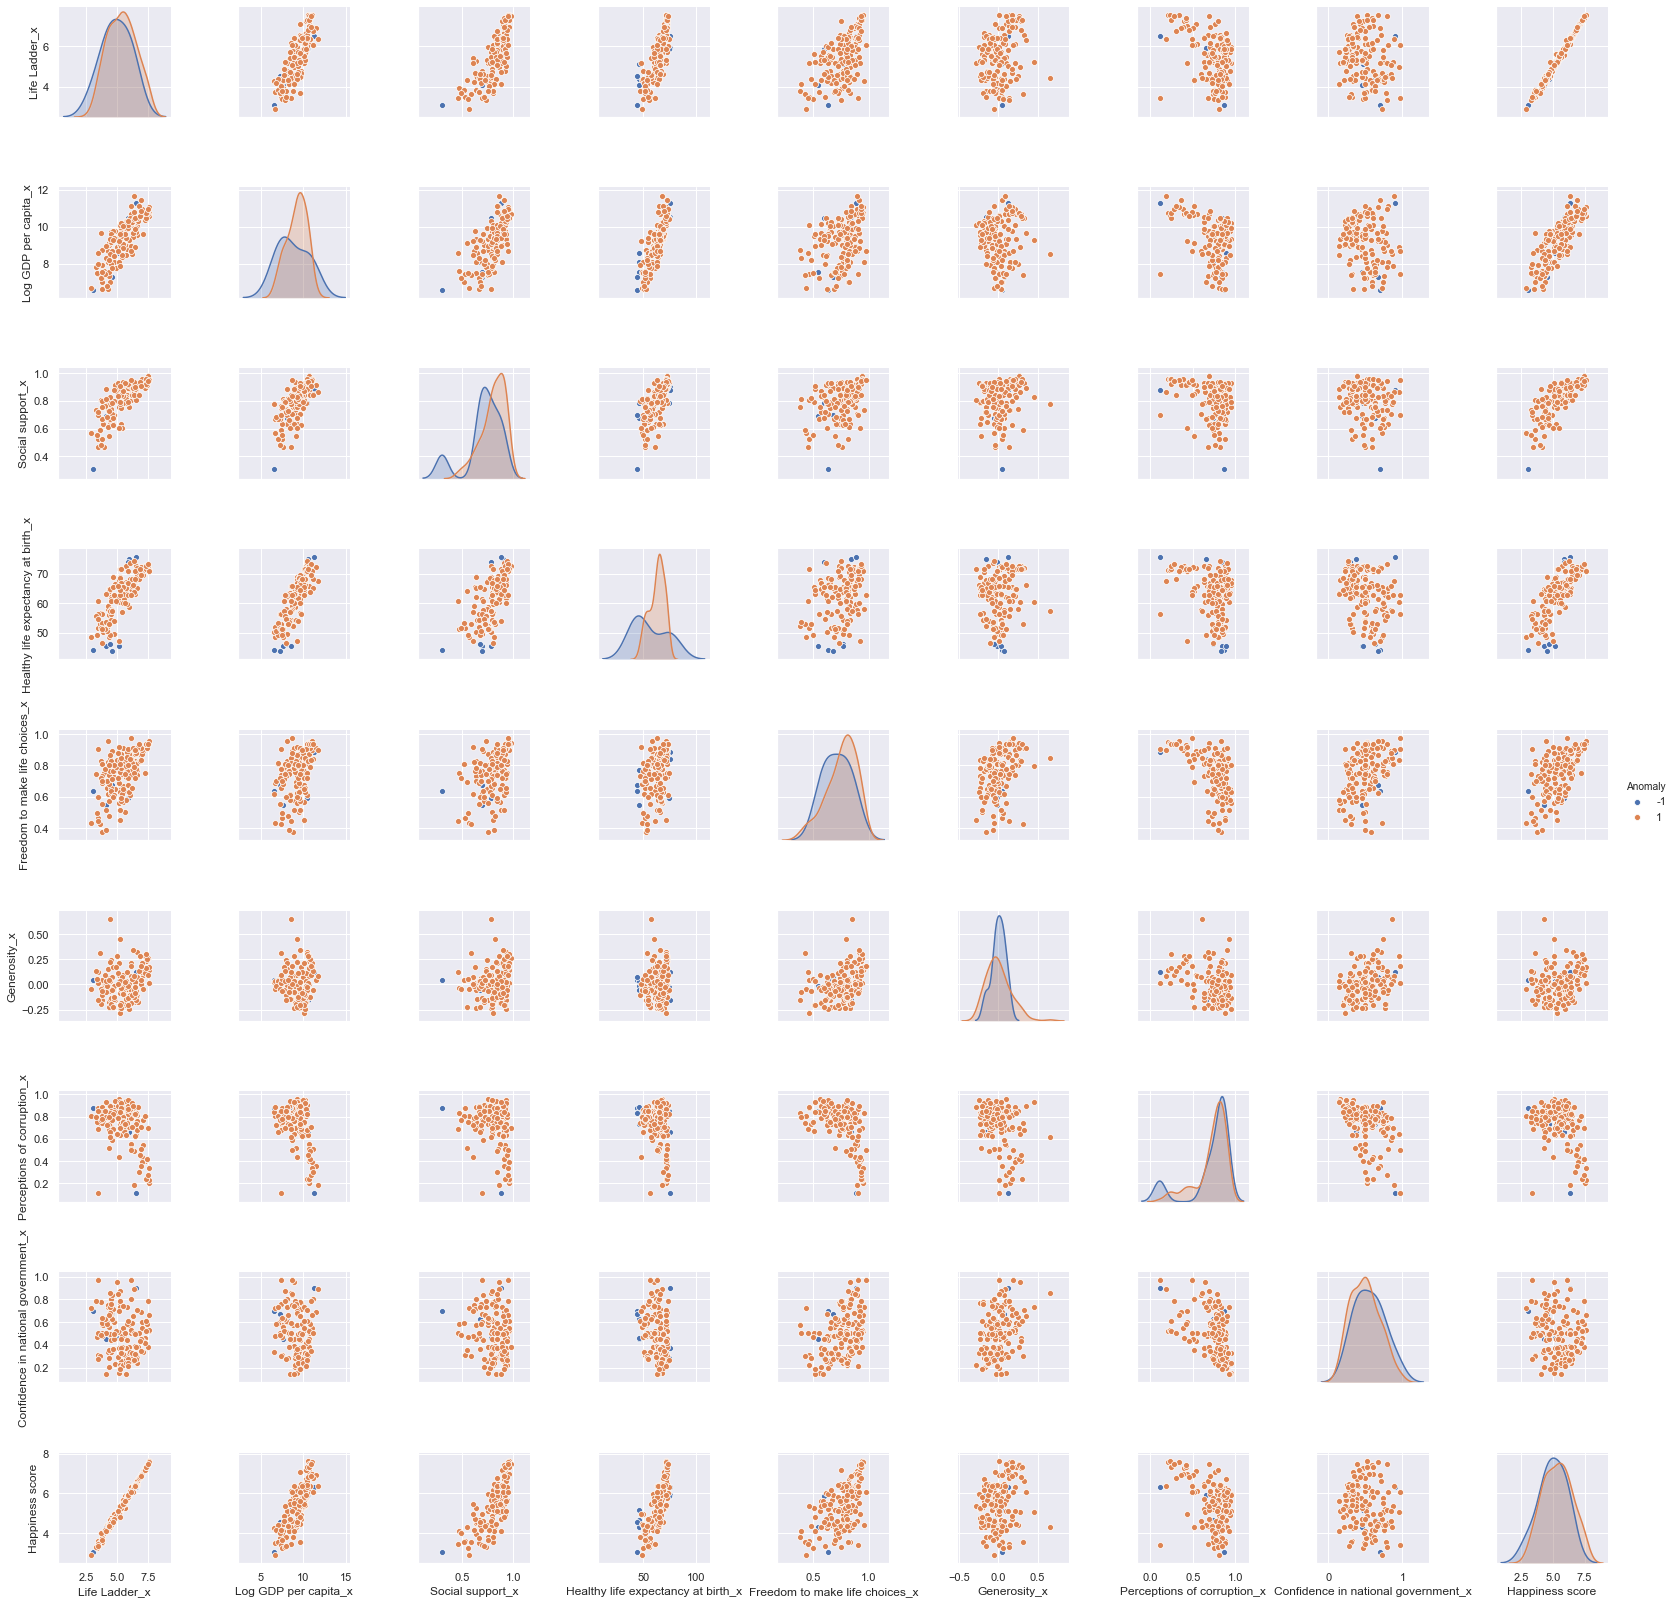

In [70]:
# Visualize the Anomalies in the Data
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Anomaly")

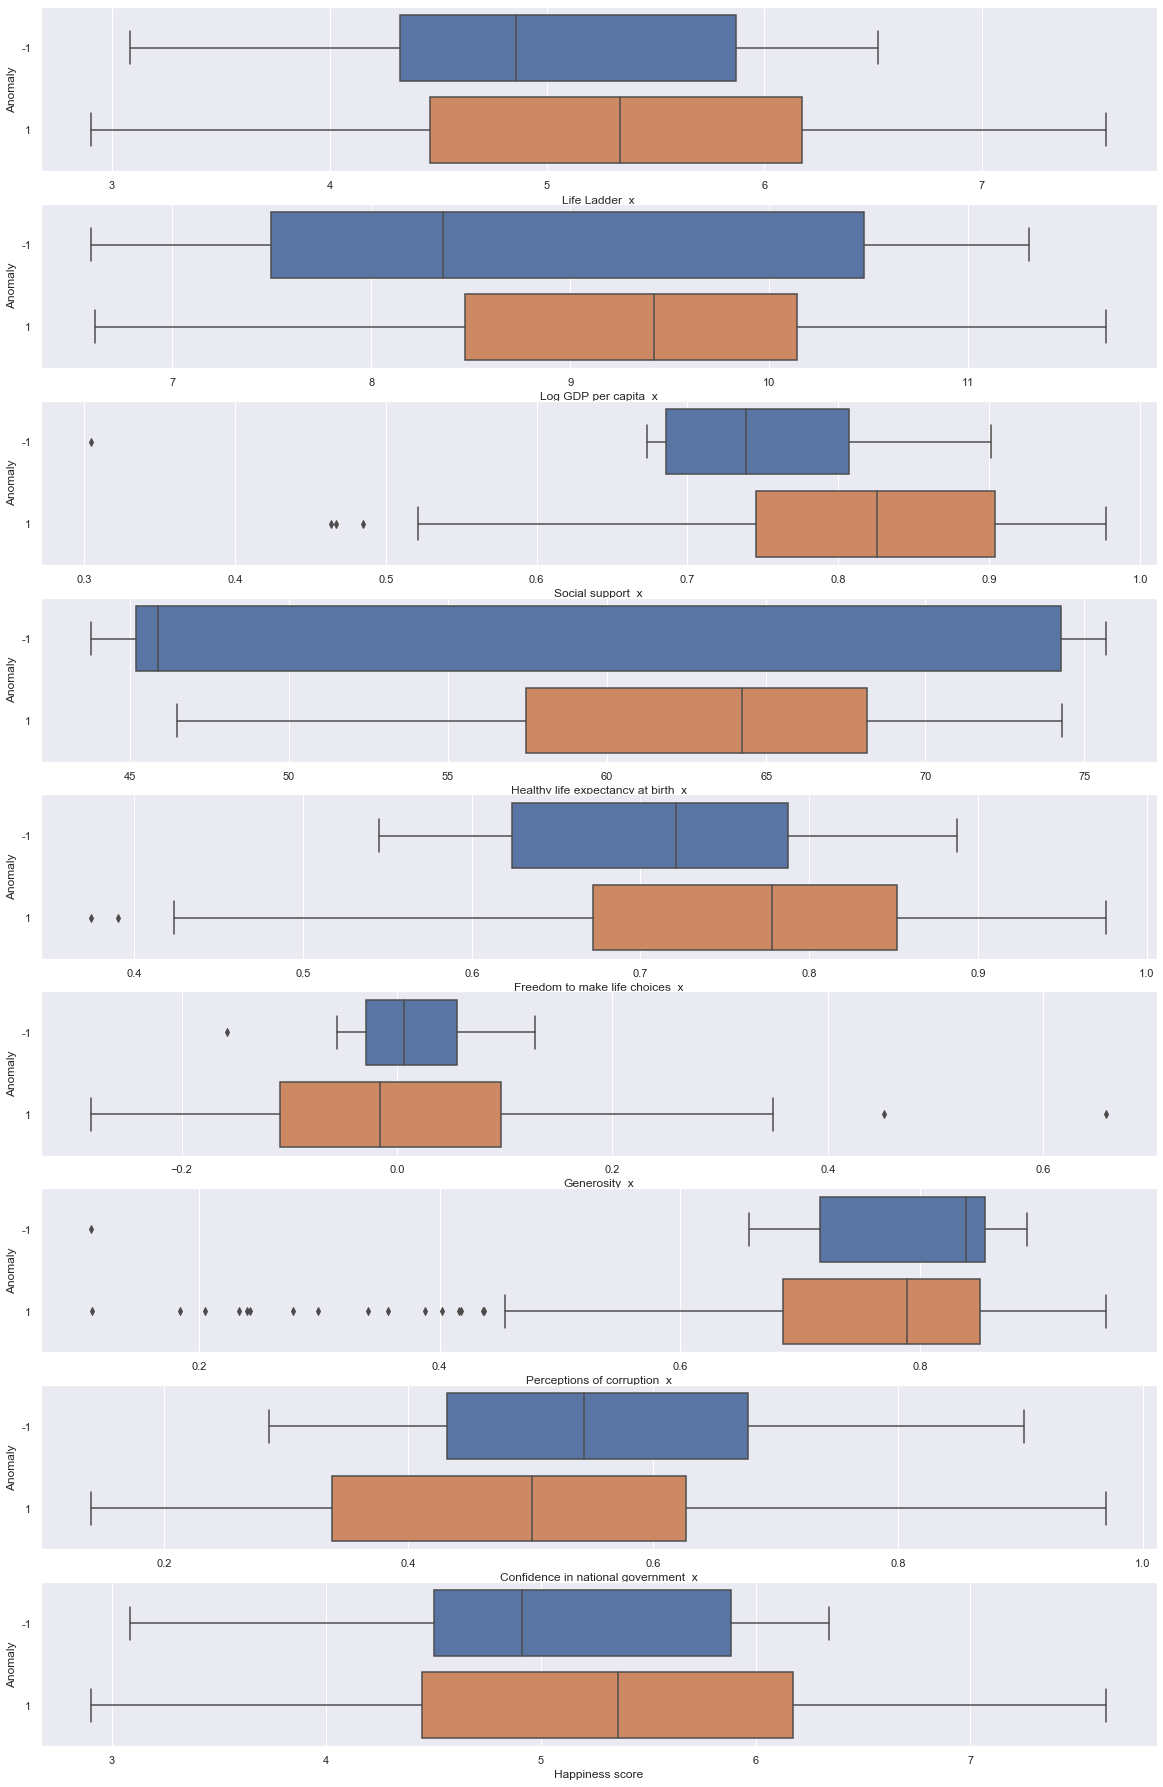

In [71]:
# Boxplots for all Features against the Anomalies
f, axes = plt.subplots(9, 1, figsize=(20,32))
sb.boxplot(x = 'Life Ladder_x', y = 'Anomaly', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'Log GDP per capita_x', y = 'Anomaly', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'Social support_x', y = 'Anomaly', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'Healthy life expectancy at birth_x', y = 'Anomaly', data = X_labeled, ax = axes[3])
sb.boxplot(x = 'Freedom to make life choices_x', y = 'Anomaly', data = X_labeled, ax = axes[4])
sb.boxplot(x = 'Generosity_x', y = 'Anomaly', data = X_labeled, ax = axes[5])
sb.boxplot(x = 'Perceptions of corruption_x', y = 'Anomaly', data = X_labeled, ax = axes[6])
sb.boxplot(x = 'Confidence in national government_x', y = 'Anomaly', data = X_labeled, ax = axes[7])
sb.boxplot(x = 'Happiness score', y = 'Anomaly', data = X_labeled, ax = axes[8])

# Random Forest Algorithm
- Helps us to look for the most important variable in relation to Happiness Score

In [153]:
# copy.head()
finaldata1.head()
score1.head(10)

0      country  Happiness score
0      Country  Happiness score
1      Finland           7.6321
2       Norway           7.5937
3      Denmark           7.5553
4      Iceland           7.4952
5  Switzerland           7.4873
6  Netherlands           7.4413
7       Canada           7.3285
8  New Zealand           7.3238
9       Sweden           7.3145

In [154]:
# rf = copy.copy()
rf1 = finaldata1.copy()
rf1.drop(rf1.iloc[:,19:36], inplace = True, axis = 1)
rf = rf1.merge(score1.drop(0), on = 'country')
rf.head()

0      country         year  Life Ladder_x  Log GDP per capita_x  \
0  Afghanistan  2015.500000       3.498909              7.468086   
1      Albania  2015.500000       4.642766              9.323155   
2      Algeria  2015.666667       5.648221              9.530207   
3       Angola  2014.000000       3.794838              8.741957   
4    Argentina  2015.500000       6.458699              9.841867   

0  Social support_x  Healthy life expectancy at birth_x  \
0          0.526029                           51.855027   
1          0.635263                           68.781881   
2          0.791177                           65.446287   
3          0.754615                           52.460709   
4          0.908470                           67.328417   

0  Freedom to make life choices_x  Generosity_x  Perceptions of corruption_x  \
0                        0.461755      0.040999                     0.874880   
1                        0.729482     -0.043963                     0.886176   
2                        0.503155     -0.203714                     0.674243   
3                        0.374542     -0.157882                     0.834076   
4                        0.826487     -0.179273                     0.849269   

0  Positive affect_x  Negative affect_x  Confidence in national government_x  \
0           0.536636           0.358449                             0.313943   
1           0.679441           0.335140                             0.466103   
2           0.642798           0.280896                             0.500960   
3           0.578517           0.367864                             0.572346   
4           0.841749           0.286658                             0.378031   

0  Democratic Quality_x  Delivery Quality_x  \
0             -1.860013           -1.380474   
1              0.211621           -0.185012   
2             -1.033700           -0.791618   
3             -0.739363           -1.168539   
4              0.240345           -0.493248   

0  Standard deviation of ladder by country-year_x  \
0                                        1.701571   
1                                        2.679461   
2                                        1.928926   
3                                        2.196711   
4                                        2.154820   

0  Standard deviation/Mean of ladder by country-year_x  \
0                                           0.490019     
1                                           0.577450     
2                                           0.347137     
3                                           0.578868     
4                                           0.335193     

0  GINI index (World Bank estimate)_x  \
0                            0.374506   
1                            0.290000   
2                            0.276000   
3                            0.374506   
4                            0.442500   

0  GINI index (World Bank estimate), average 2000-15_x  \
0                                           0.387755     
1                                           0.303250     
2                                           0.276000     
3                                           0.427000     
4                                           0.476067     

0  gini of household income reported in Gallup, by wp5-year_x Happiness score  
0                                           0.429030                   3.6315  
1                                           0.416718                    4.586  
2                                           0.535888                   5.2946  
3                                           0.440699                   3.7948  
4                                           0.345649                    6.388

In [155]:
rf.isnull().sum()

0
country                                                       0
year                                                          0
Life Ladder_x                                                 0
Log GDP per capita_x                                          0
Social support_x                                              0
Healthy life expectancy at birth_x                            0
Freedom to make life choices_x                                0
Generosity_x                                                  0
Perceptions of corruption_x                                   0
Positive affect_x                                             0
Negative affect_x                                             0
Confidence in national government_x                           0
Democratic Quality_x                                          0
Delivery Quality_x                                            0
Standard deviation of ladder by country-year_x                0
Standard deviation/Mean of ladder by c

In [156]:
# rf= rf.drop(columns =['GINI index (World Bank estimate)','gini of household income reported in Gallup, by wp5-year','year'])
rf= rf.drop(columns =['GINI index (World Bank estimate)_x','gini of household income reported in Gallup, by wp5-year_x','year'])

In [157]:
rf = rf.fillna(rf.mean())

In [158]:
rf.isnull().sum()

0
country                                                0
Life Ladder_x                                          0
Log GDP per capita_x                                   0
Social support_x                                       0
Healthy life expectancy at birth_x                     0
Freedom to make life choices_x                         0
Generosity_x                                           0
Perceptions of corruption_x                            0
Positive affect_x                                      0
Negative affect_x                                      0
Confidence in national government_x                    0
Democratic Quality_x                                   0
Delivery Quality_x                                     0
Standard deviation of ladder by country-year_x         0
Standard deviation/Mean of ladder by country-year_x    0
GINI index (World Bank estimate), average 2000-15_x    0
Happiness score                                        0
dtype: int64

In [159]:
rf.head()

0      country  Life Ladder_x  Log GDP per capita_x  Social support_x  \
0  Afghanistan       3.498909              7.468086          0.526029   
1      Albania       4.642766              9.323155          0.635263   
2      Algeria       5.648221              9.530207          0.791177   
3       Angola       3.794838              8.741957          0.754615   
4    Argentina       6.458699              9.841867          0.908470   

0  Healthy life expectancy at birth_x  Freedom to make life choices_x  \
0                           51.855027                        0.461755   
1                           68.781881                        0.729482   
2                           65.446287                        0.503155   
3                           52.460709                        0.374542   
4                           67.328417                        0.826487   

0  Generosity_x  Perceptions of corruption_x  Positive affect_x  \
0      0.040999                     0.874880           0.536636   
1     -0.043963                     0.886176           0.679441   
2     -0.203714                     0.674243           0.642798   
3     -0.157882                     0.834076           0.578517   
4     -0.179273                     0.849269           0.841749   

0  Negative affect_x  Confidence in national government_x  \
0           0.358449                             0.313943   
1           0.335140                             0.466103   
2           0.280896                             0.500960   
3           0.367864                             0.572346   
4           0.286658                             0.378031   

0  Democratic Quality_x  Delivery Quality_x  \
0             -1.860013           -1.380474   
1              0.211621           -0.185012   
2             -1.033700           -0.791618   
3             -0.739363           -1.168539   
4              0.240345           -0.493248   

0  Standard deviation of ladder by country-year_x  \
0                                        1.701571   
1                                        2.679461   
2                                        1.928926   
3                                        2.196711   
4                                        2.154820   

0  Standard deviation/Mean of ladder by country-year_x  \
0                                           0.490019     
1                                           0.577450     
2                                           0.347137     
3                                           0.578868     
4                                           0.335193     

0  GINI index (World Bank estimate), average 2000-15_x Happiness score  
0                                           0.387755            3.6315  
1                                           0.303250             4.586  
2                                           0.276000            5.2946  
3                                           0.427000            3.7948  
4                                           0.476067             6.388

In [160]:
#LabelEncoder for each country for preprocessing
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
# rf['country_code'] = lb_make.fit_transform(rf['country'])
rf['Happiness_code'] = lb_make.fit_transform(rf['Happiness score'])

In [161]:
rf.head()

0      country  Life Ladder_x  Log GDP per capita_x  Social support_x  \
0  Afghanistan       3.498909              7.468086          0.526029   
1      Albania       4.642766              9.323155          0.635263   
2      Algeria       5.648221              9.530207          0.791177   
3       Angola       3.794838              8.741957          0.754615   
4    Argentina       6.458699              9.841867          0.908470   

0  Healthy life expectancy at birth_x  Freedom to make life choices_x  \
0                           51.855027                        0.461755   
1                           68.781881                        0.729482   
2                           65.446287                        0.503155   
3                           52.460709                        0.374542   
4                           67.328417                        0.826487   

0  Generosity_x  Perceptions of corruption_x  Positive affect_x  \
0      0.040999                     0.874880           0.536636   
1     -0.043963                     0.886176           0.679441   
2     -0.203714                     0.674243           0.642798   
3     -0.157882                     0.834076           0.578517   
4     -0.179273                     0.849269           0.841749   

0  Negative affect_x  Confidence in national government_x  \
0           0.358449                             0.313943   
1           0.335140                             0.466103   
2           0.280896                             0.500960   
3           0.367864                             0.572346   
4           0.286658                             0.378031   

0  Democratic Quality_x  Delivery Quality_x  \
0             -1.860013           -1.380474   
1              0.211621           -0.185012   
2             -1.033700           -0.791618   
3             -0.739363           -1.168539   
4              0.240345           -0.493248   

0  Standard deviation of ladder by country-year_x  \
0                                        1.701571   
1                                        2.679461   
2                                        1.928926   
3                                        2.196711   
4                                        2.154820   

0  Standard deviation/Mean of ladder by country-year_x  \
0                                           0.490019     
1                                           0.577450     
2                                           0.347137     
3                                           0.578868     
4                                           0.335193     

0  GINI index (World Bank estimate), average 2000-15_x Happiness score  \
0                                           0.387755            3.6315   
1                                           0.303250             4.586   
2                                           0.276000            5.2946   
3                                           0.427000            3.7948   
4                                           0.476067             6.388   

0  Happiness_code  
0              11  
1              44  
2              72  
3              14  
4             124

In [162]:
#import train_test_split function
from sklearn.model_selection import train_test_split
# x = rf[['Life Ladder', 'Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect','Confidence in national government','Democratic Quality','Delivery Quality','Standard deviation of ladder by country-year','Standard deviation/Mean of ladder by country-year','GINI index (World Bank estimate), average 2000-15']]
x = rf[['Life Ladder_x', 'Log GDP per capita_x','Social support_x','Healthy life expectancy at birth_x','Freedom to make life choices_x','Generosity_x','Perceptions of corruption_x','Positive affect_x','Negative affect_x','Confidence in national government_x','Democratic Quality_x','Delivery Quality_x','Standard deviation of ladder by country-year_x','Standard deviation/Mean of ladder by country-year_x','GINI index (World Bank estimate), average 2000-15_x']]
# y = rf['country_code'] #labels
y = rf['Happiness_code']

#split dataset into training set and test set
#split 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [173]:
#Import random forest model
from sklearn.ensemble import RandomForestClassifier

#create a gaussian classifier
clf = RandomForestClassifier(n_estimators = 100)

#train th emodel using training set
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [174]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [175]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0


In [166]:
rf = rf.drop(columns = 'country')

In [167]:
rf.head()

0  Life Ladder_x  Log GDP per capita_x  Social support_x  \
0       3.498909              7.468086          0.526029   
1       4.642766              9.323155          0.635263   
2       5.648221              9.530207          0.791177   
3       3.794838              8.741957          0.754615   
4       6.458699              9.841867          0.908470   

0  Healthy life expectancy at birth_x  Freedom to make life choices_x  \
0                           51.855027                        0.461755   
1                           68.781881                        0.729482   
2                           65.446287                        0.503155   
3                           52.460709                        0.374542   
4                           67.328417                        0.826487   

0  Generosity_x  Perceptions of corruption_x  Positive affect_x  \
0      0.040999                     0.874880           0.536636   
1     -0.043963                     0.886176           0.679441   
2     -0.203714                     0.674243           0.642798   
3     -0.157882                     0.834076           0.578517   
4     -0.179273                     0.849269           0.841749   

0  Negative affect_x  Confidence in national government_x  \
0           0.358449                             0.313943   
1           0.335140                             0.466103   
2           0.280896                             0.500960   
3           0.367864                             0.572346   
4           0.286658                             0.378031   

0  Democratic Quality_x  Delivery Quality_x  \
0             -1.860013           -1.380474   
1              0.211621           -0.185012   
2             -1.033700           -0.791618   
3             -0.739363           -1.168539   
4              0.240345           -0.493248   

0  Standard deviation of ladder by country-year_x  \
0                                        1.701571   
1                                        2.679461   
2                                        1.928926   
3                                        2.196711   
4                                        2.154820   

0  Standard deviation/Mean of ladder by country-year_x  \
0                                           0.490019     
1                                           0.577450     
2                                           0.347137     
3                                           0.578868     
4                                           0.335193     

0  GINI index (World Bank estimate), average 2000-15_x Happiness score  \
0                                           0.387755            3.6315   
1                                           0.303250             4.586   
2                                           0.276000            5.2946   
3                                           0.427000            3.7948   
4                                           0.476067             6.388   

0  Happiness_code  
0              11  
1              44  
2              72  
3              14  
4             124

In [192]:
# rf_list = []
# for i in rf:
#     if i != 'country_code':
#         rf_list.append(i)
        
# print(len(rf_list))

rf_list = []
for i in rf:
    if i != 'Happiness_code' and i != 'Happiness score':
        rf_list.append(i)
        
print(len(rf_list))

15


In [193]:
rf_list

['Life Ladder_x',
 'Log GDP per capita_x',
 'Social support_x',
 'Healthy life expectancy at birth_x',
 'Freedom to make life choices_x',
 'Generosity_x',
 'Perceptions of corruption_x',
 'Positive affect_x',
 'Negative affect_x',
 'Confidence in national government_x',
 'Democratic Quality_x',
 'Delivery Quality_x',
 'Standard deviation of ladder by country-year_x',
 'Standard deviation/Mean of ladder by country-year_x',
 'GINI index (World Bank estimate), average 2000-15_x']

In [194]:
impt = pd.Series(clf.feature_importances_, index = rf_list).sort_values(ascending = False)
impt

GINI index (World Bank estimate), average 2000-15_x    0.078829
Positive affect_x                                      0.076045
Confidence in national government_x                    0.070813
Generosity_x                                           0.070755
Negative affect_x                                      0.069418
Healthy life expectancy at birth_x                     0.068113
Standard deviation of ladder by country-year_x         0.067981
Freedom to make life choices_x                         0.064855
Social support_x                                       0.064277
Log GDP per capita_x                                   0.063369
Democratic Quality_x                                   0.062933
Delivery Quality_x                                     0.061908
Standard deviation/Mean of ladder by country-year_x    0.061631
Life Ladder_x                                          0.060045
Perceptions of corruption_x                            0.059029
dtype: float64

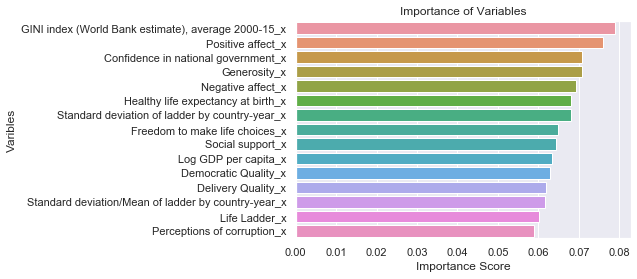

In [195]:
#creating a bar plot
sb.barplot(x=impt, y=impt.index)
#add labels to graph
plt.xlabel("Importance Score")
plt.ylabel('Varibles')
plt.title('Importance of Variables')
plt.show()

### Most important variables:

# Multi-Variate Linear Regression

Intercept of Regression 	: b =  [0.056682]
Coefficients of Regression 	: a =  [[ 0.99289259  0.0073017  -0.00606881 -0.00131846]]

                           Predictors  Coefficients
0                       Life Ladder_x      0.992893
1                Log GDP per capita_x      0.007302
2                    Social support_x     -0.006069
3  Healthy life expectancy at birth_x     -0.001318



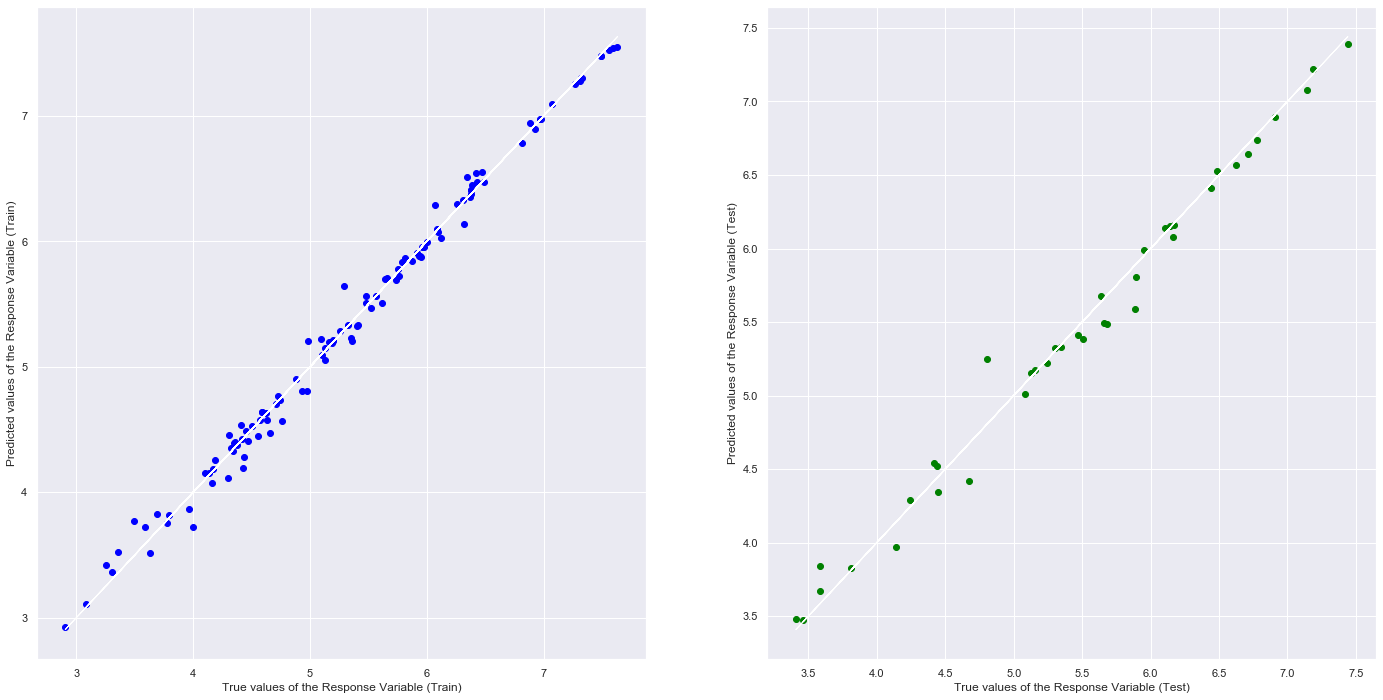

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9927738049888576
Mean Squared Error (MSE) 	: 0.00926434199859467

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9868161669074544
Mean Squared Error (MSE) 	: 0.01586561708065165



In [90]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(cleandata["Happiness score"]) # Response
X = pd.DataFrame(cleandata[['Life Ladder_x','Log GDP per capita_x','Social support_x','Healthy life expectancy at birth_x']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Prediction of Happiness Score
Predicting the value of Happiness score for a few specific Country -- Singapore, Malaysia and United States -- using the Regression Model derived above.

In [91]:
# Extract Happiness Score for Prediction
cleandata_pred = cleandata[cleandata["country"].isin(["Singapore", "Malaysia", "United States"])]
cleandata_pred

0          country  Life Ladder_x  Log GDP per capita_x  Social support_x  \
84        Malaysia       6.142521             10.110291          0.840342   
120      Singapore       6.523452             11.304794          0.877737   
145  United States       6.952605             10.879187          0.905856   

0    Healthy life expectancy at birth_x  Freedom to make life choices_x  \
84                            64.983311                        0.741489   
120                           75.675051                        0.887911   
145                           69.770920                        0.835305   

0    Generosity_x  Perceptions of corruption_x  Positive affect_x  \
84       0.212008                     0.841354           0.772125   
120      0.128124                     0.110162           0.817061   
145      0.179972                     0.704980           0.820108   

0    Negative affect_x  Confidence in national government_x  \
84            0.287313                             0.534103   
120           0.153021                             0.902511   
145           0.272106                             0.344837   

0    Democratic Quality_x  Delivery Quality_x  \
84              -0.056547            0.673893   
120              0.567555            2.064073   
145              0.817886            1.458826   

0    Standard deviation of ladder by country-year_x  \
84                                         2.116058   
120                                        1.439499   
145                                        1.969304   

0    Standard deviation/Mean of ladder by country-year_x  \
84                                            0.345237     
120                                           0.220880     
145                                           0.283262     

0    GINI index (World Bank estimate)_x  \
84                             0.461500   
120                            0.374506   
145                            0.408333   

0    GINI index (World Bank estimate), average 2000-15_x  \
84                                            0.461000     
120                                           0.387755     
145                                           0.406800     

0    gini of household income reported in Gallup, by wp5-year_x  \
84                                            0.446691            
120                                           0.472976            
145                                           0.676827            

0    Happiness score  
84            6.3221  
120           6.3432  
145           6.8860

In [92]:
# Extract Predictors for Prediction
predictors = ['Life Ladder_x','Log GDP per capita_x','Social support_x','Healthy life expectancy at birth_x']
X_pred = pd.DataFrame(cleandata_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = linreg.predict(X_pred)
y_pred

array([[6.13859052],
       [6.51121207],
       [6.94182105]])

In [93]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["Prediction Happiness score"], index = cleandata_pred.index)
cleandata_acc = pd.concat([cleandata_pred[["country", "Happiness score"]], y_pred], axis = 1)

y_errs = 100 * abs(cleandata_acc["Happiness score"] - cleandata_acc["Prediction Happiness score"]) / cleandata_acc["Happiness score"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = cleandata_pred.index)
cleandata_acc = pd.concat([cleandata_acc, y_errs], axis = 1)

cleandata_acc

country  Happiness score  Prediction Happiness score     Error
84        Malaysia           6.3221                    6.138591  2.902669
120      Singapore           6.3432                    6.511212  2.648692
145  United States           6.8860                    6.941821  0.810643

# Prediction Interval
- The confidence on the prediction

In [94]:
MSE_train = mean_squared_error(y_train, y_train_pred)
StdE_pred = np.sqrt(len(y_train) * MSE_train/(len(y_train) - 2))

print("Mean Squared Error (MSE) \t:", MSE_train.round(2))
print("Pred Standard Error (SE) \t:", StdE_pred.round(2))

Mean Squared Error (MSE) 	: 0.01
Pred Standard Error (SE) 	: 0.1


In [95]:
y_95l = pd.DataFrame(cleandata_acc["Prediction Happiness score"] - 1.96*StdE_pred).rename(columns = {"Prediction Happiness score" : "95 Lower"})
y_95u = pd.DataFrame(cleandata_acc["Prediction Happiness score"] + 1.96*StdE_pred).rename(columns = {"Prediction Happiness score" : "95 Upper"})
y_99l = pd.DataFrame(cleandata_acc["Prediction Happiness score"] - 2.58*StdE_pred).rename(columns = {"Prediction Happiness score" : "99 Lower"})
y_99u = pd.DataFrame(cleandata_acc["Prediction Happiness score"] + 2.58*StdE_pred).rename(columns = {"Prediction Happiness score" : "99 Upper"})

cleandata_int = pd.concat([cleandata_acc, y_95l, y_95u, y_99l, y_99u], axis = 1)
cleandata_int

country  Happiness score  Prediction Happiness score     Error  \
84        Malaysia           6.3221                    6.138591  2.902669   
120      Singapore           6.3432                    6.511212  2.648692   
145  United States           6.8860                    6.941821  0.810643   

     95 Lower  95 Upper  99 Lower  99 Upper  
84   5.948261  6.328920  5.888054  6.389127  
120  6.320882  6.701542  6.260676  6.761748  
145  6.751491  7.132151  6.691285  7.192357